# 1. Define the problem and perform an Exploratory Data Analysis

### Problem Statements:

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.
Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

### Objective:
1.	Explore and visualize the dataset.
2.	Build a classification model to predict if the customer is going to churn or not
3.	Optimize the model using appropriate techniques
4.	Generate a set of insights and recommendations that will help the bank

To predict which customers will leave their credit card services from the bank.

### 1.1 Import Libraries

In [5]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

# Library to build a logistic regression model
from sklearn.linear_model import LogisticRegression

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries for imputataion and Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
# To read the BankChurners.csv file into dataframe 
BC_df = pd.read_csv("BankChurners.csv")
BC_df_copy = BC_df.copy()  # To backup the file 
BC_df.head(10) 

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   
5              36  ...                       1                      2   
6              46  ...                       1                      3   
7              27  ...                       2                      2   
8              36  ...                       2                      0   
9              36  ...                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   
5      4010.000                 1247         2763.000                 1.376   
6     34516.000                 2264        32252.000                 1.975   
7     29081.000                 1396        27685.000                 2.204   
8     22352.000                 2517        19835.000                 3.355   
9     11656.000                 1677         9979.000                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36                0.714                  0.048  
8             1350              24                1.182              

### 1.2 Observations on Data

In [7]:
#Shape of the data (rows and columns)
print('There are :', BC_df.shape[0] ,'rows and', BC_df.shape[1], 'columns')

There are : 10127 rows and 21 columns


In [8]:
#To view dataframe details
BC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There is no null values in any features
- There are integer, float and object datatypes

In [9]:
#To check for the missing values
BC_df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- There is no null values in any feature

In [10]:
BC_df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [11]:
# Some Features to be a casted as categorical variable
BC_df["Attrition_Flag"]  = BC_df["Attrition_Flag"].astype("category")
BC_df["Gender"]          = BC_df["Gender"].astype("category")
BC_df["Education_Level"] = BC_df["Education_Level"].astype("category")
BC_df["Marital_Status"]  = BC_df["Marital_Status"].astype("category")
BC_df["Income_Category"] = BC_df["Income_Category"].astype("category")
BC_df["Card_Category"]   = BC_df["Card_Category"].astype("category")

- The above features are changed to Category based on number of unique values

In [12]:
#To view dataframe details
BC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

### 1.3 Summary of the dataset.

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
BC_df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

- The Customer age is between 26 and 73.
- The count of dependents is between zero and maximum 5 for the customers and they are right skewed.
- The period of relation with banks spans from minimum 13 months to 56 months and they are right skewed.
- The producs held by customer is between 1 and 6 and they are slightly right skewed.
- The months inactive for 12 months, no of contacts in 12 months is having minimum zero and maximum 6 and they are right skewed.
- The creditlimit,Total revolving balance,average open to buy, total transaction amount are rightly skewed. 
- Total Transaction count is minimum 10 and maximum 139 with rightly skewed.

In [14]:
BC_df.describe(include=['category']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

**Let's look at the unqiue values of all the categories**

In [15]:
cols_cat= BC_df.select_dtypes(['category'])

In [16]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
***********

### 1.4 Univariate Analysis
Before we process data, lets take the graphical visualization of the data to understand better.

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

### Observation on Client id 

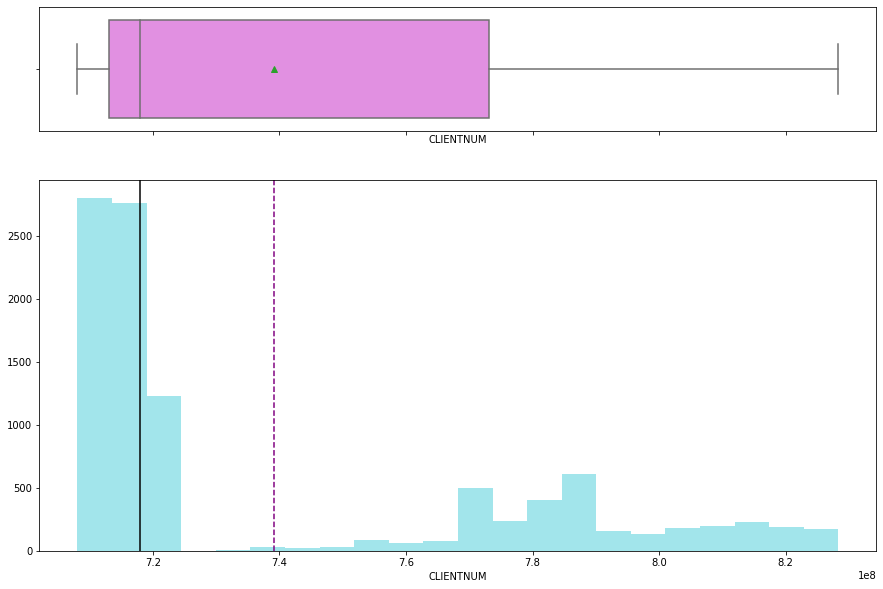

In [18]:
histogram_boxplot(BC_df["CLIENTNUM"])

- Client is not uniformaly distributed and is right skewed.

### Observation on Customer Age 

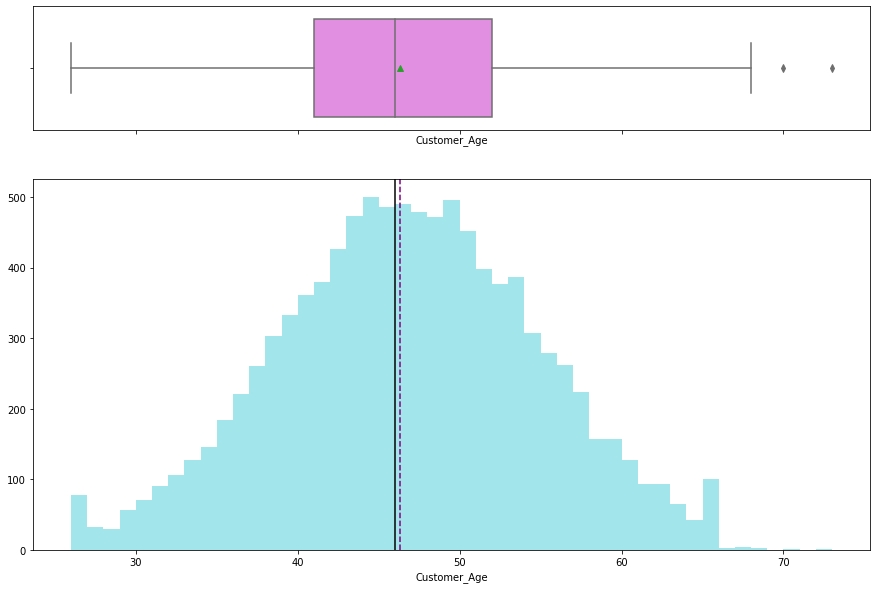

In [19]:
histogram_boxplot(BC_df["Customer_Age"])

- Customer Age is uniformly distributed and slighlty right skewed.
- There are few outliers found outside the upper limit. 

### Observation on Dependent count

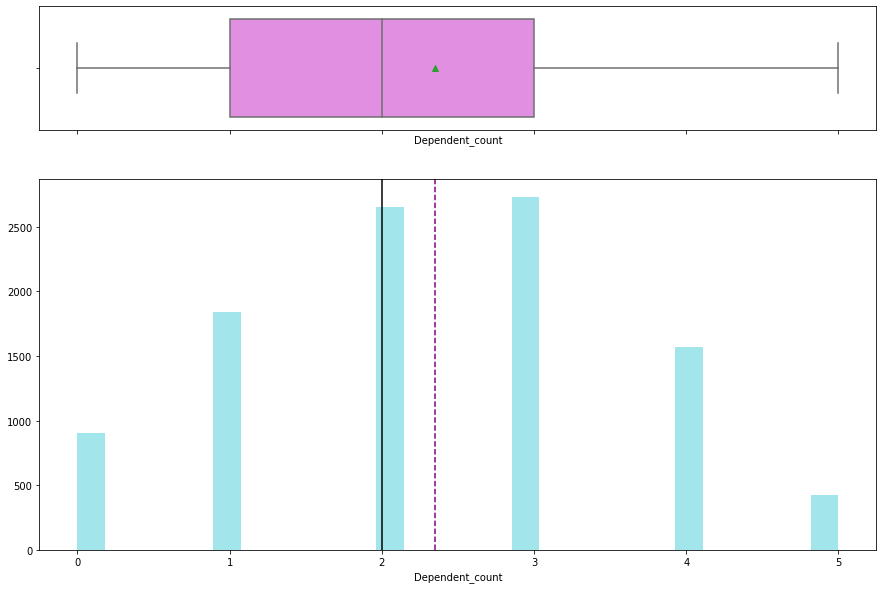

In [20]:
histogram_boxplot(BC_df["Dependent_count"])

- The minimum dependent count is 0 and maximum is 3. 
- The distribution is right skewed with no outliers.

### Observation on Months on book

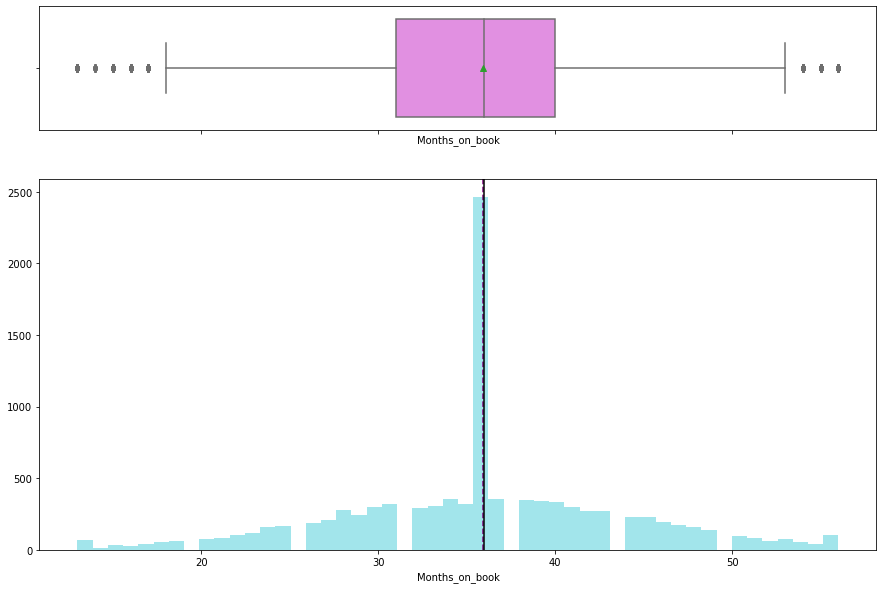

In [21]:
histogram_boxplot(BC_df["Months_on_book"])

- Months on book is having very slight left skewed.
- There are outliers in both lower and upper ends of distribution. 
- Most of customers relation with bank is around 36 months i.e around 3 years. 

### Observation on Total relationship count

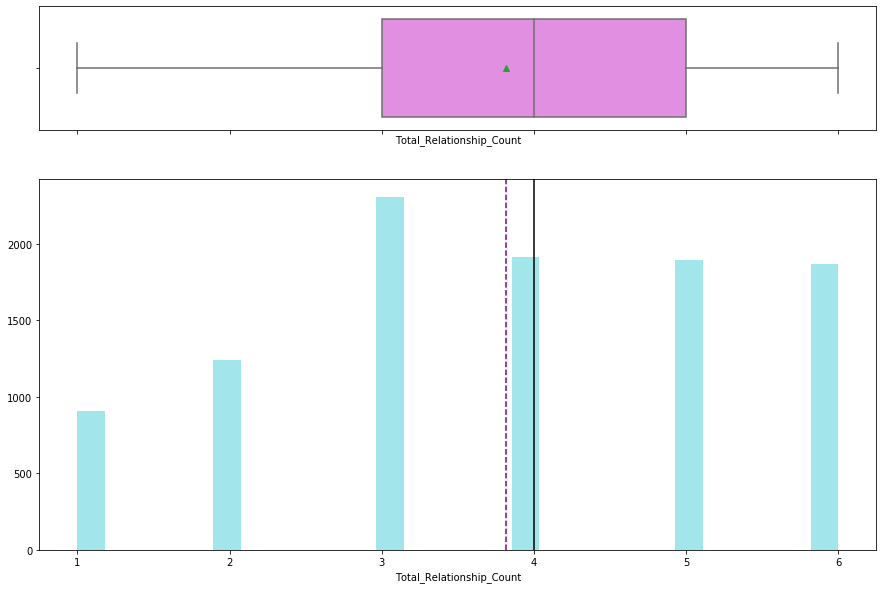

In [22]:
histogram_boxplot(BC_df["Total_Relationship_Count"])

- Total relationship count distribution is left skewed with no outliers.
- Most of customers have 3 products with the bank. 

### Observation on Months inactive 12 months 

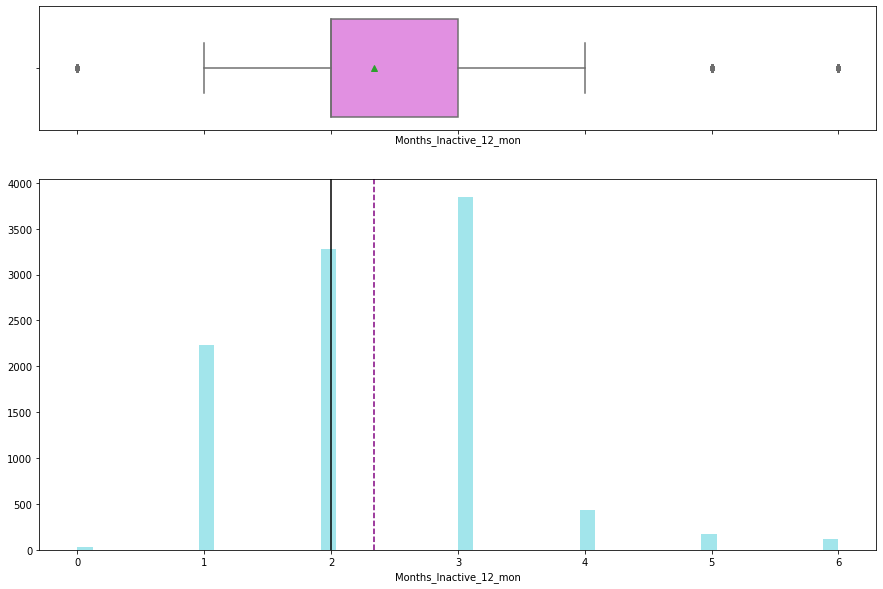

In [23]:
histogram_boxplot(BC_df["Months_Inactive_12_mon"])

- No. of months inactive in the last 12 months distribution is right skewed.
- Most of customers are inactive for 3 months with the bank.
- There are outliers in both lower and upper part of the distribution

### Observation on Contacts 12 months

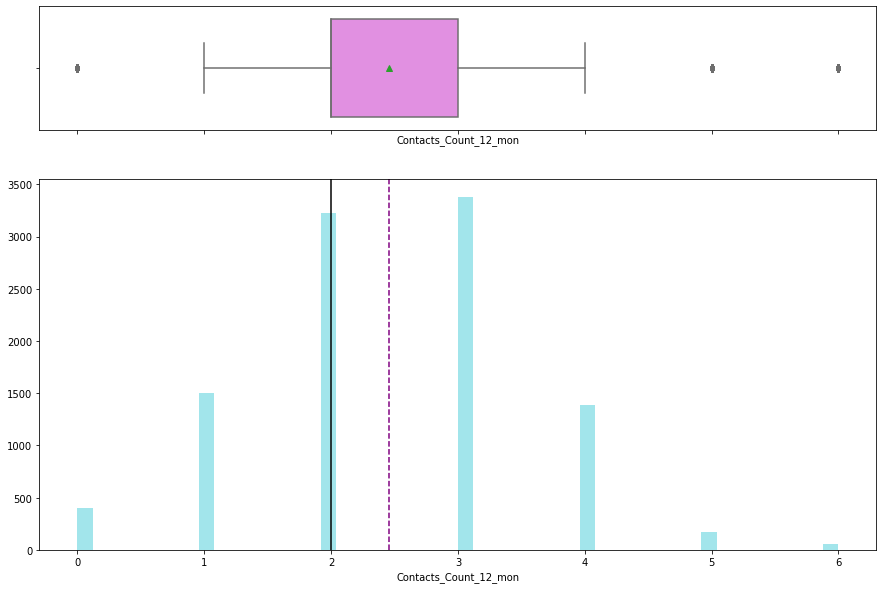

In [24]:
histogram_boxplot(BC_df["Contacts_Count_12_mon"])

- No. of Contacts in the last 12 months distribution is right skewed.
- Most of customers contacts the bank for 3 months with the bank.
- There are outliers in both lower and upper part of the distribution

### Observation on Total revolving balance

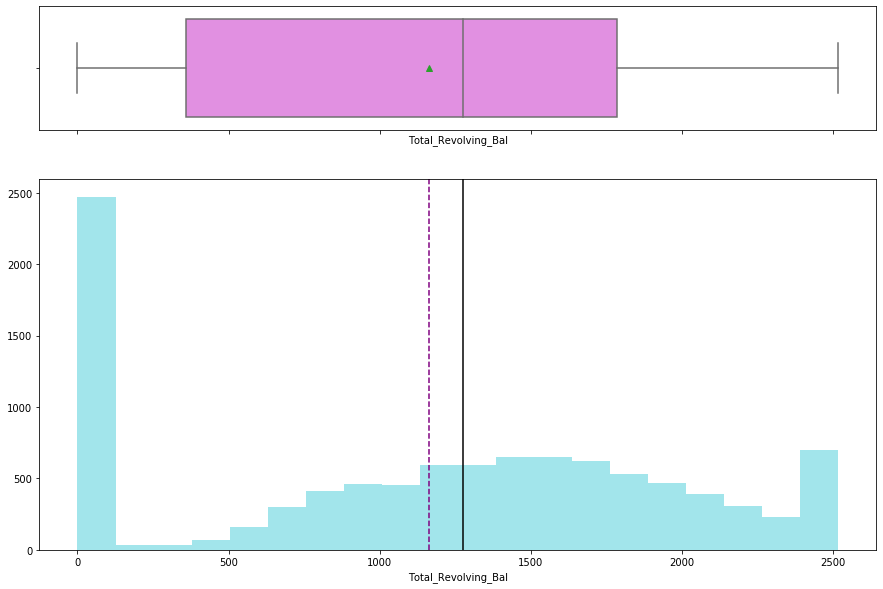

In [25]:
histogram_boxplot(BC_df["Total_Revolving_Bal"])

- Total revolving balance distribution is left skewed.
- Most of customers having balance as zero.
- No outliers in the distribution

### Observation on Average open to buy

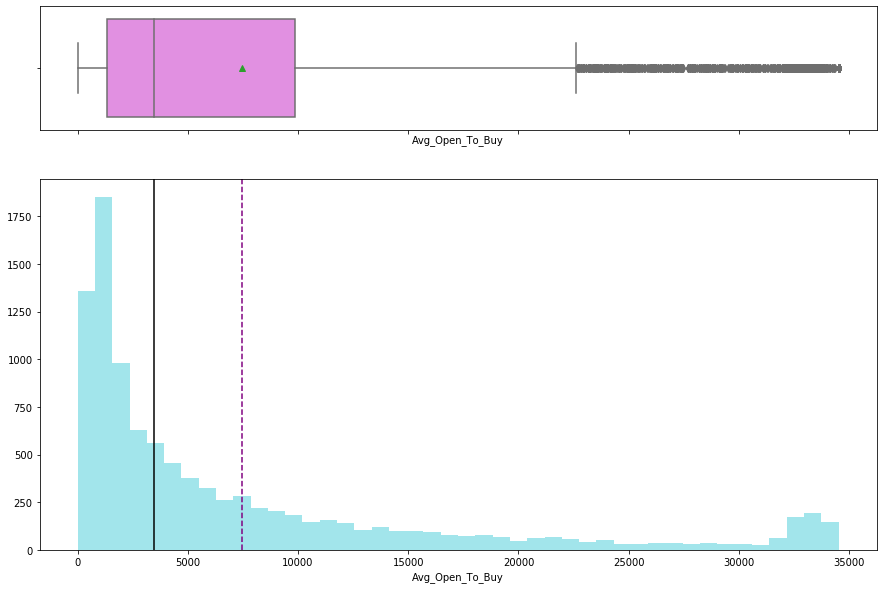

In [26]:
histogram_boxplot(BC_df["Avg_Open_To_Buy"])

- Open to Buy Credit Line (Average of last 12 months) distribution is right skewed.
- There are more outliers in the upper part of distribution

### Observation on Total amount change Q4_Q1

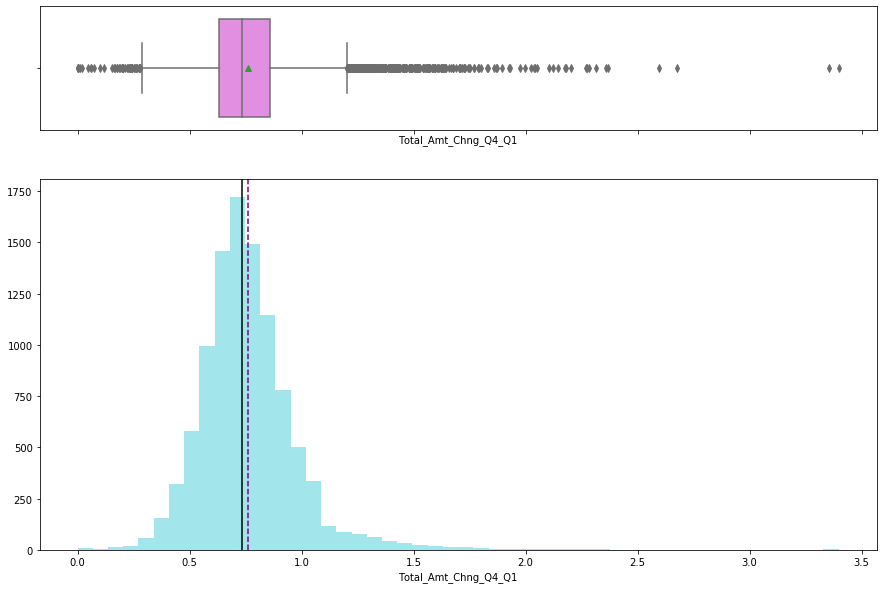

In [27]:
histogram_boxplot(BC_df["Total_Amt_Chng_Q4_Q1"])

- Change in Transaction Amount (Q4 over Q1) distribution is slightly right skewed.
- There are outliers in both lower and upper part of distribution.

### Observation on Total Transaction amount

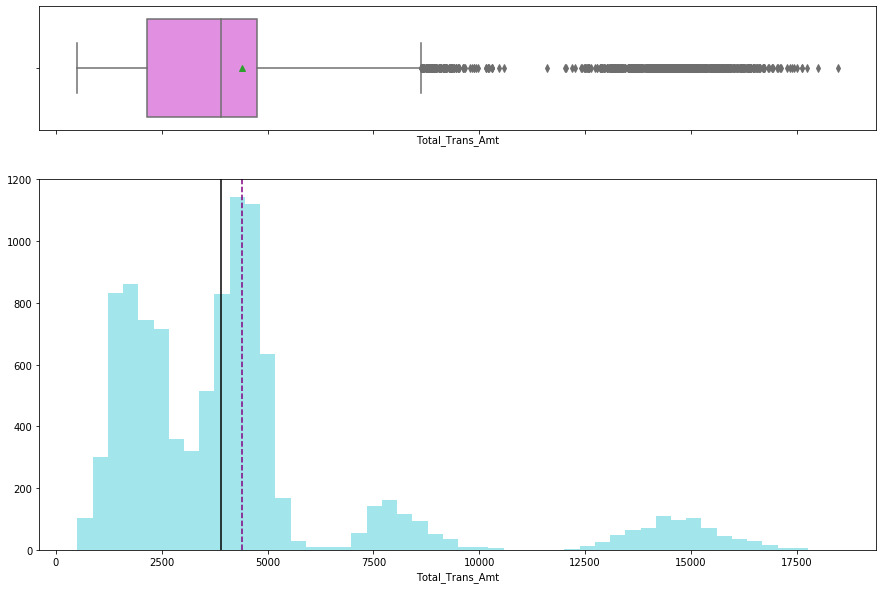

In [28]:
histogram_boxplot(BC_df["Total_Trans_Amt"])

- Total Transaction amount distribution is right skewed.
- There are more outliers in upper part of distribution.

### Observation on Total Transaction count

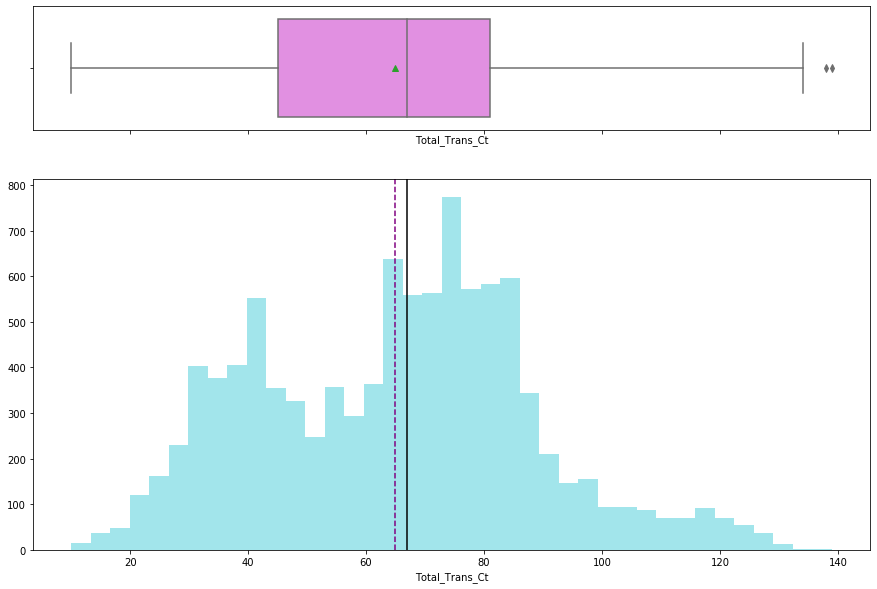

In [29]:
histogram_boxplot(BC_df["Total_Trans_Ct"])

- Total Transaction count distribution is left skewed.
- There are few outliers in upper part of distribution.

### Observation on Total count change Q4_Q1

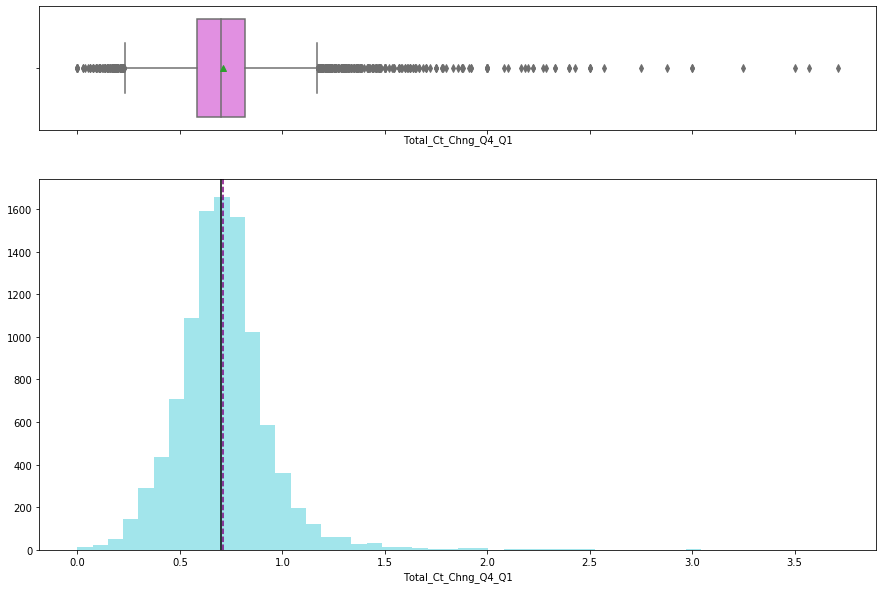

In [30]:
histogram_boxplot(BC_df["Total_Ct_Chng_Q4_Q1"])

- Change in Transaction Count (Q4 over Q1) distribution is slightly right skewed.
- There are more outliers in both lower and upper part of distribution.

### Observation on Average Utilization Ratio 

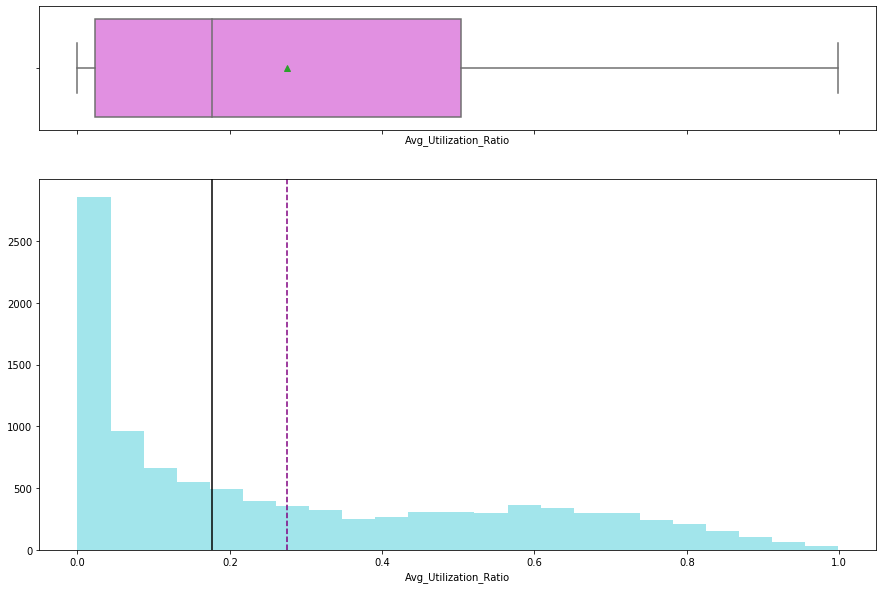

In [31]:
histogram_boxplot(BC_df["Avg_Utilization_Ratio"])

- Average Card Utilization Ratio distribution is right skewed.
- There are no outliers in the distribution.

In [32]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

### Observation on Attrition Flag

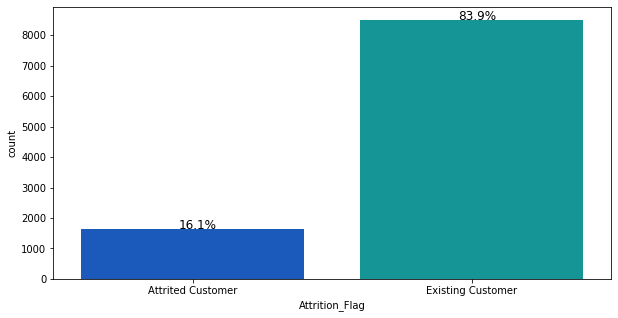

In [33]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(BC_df["Attrition_Flag"], palette="winter")
perc_on_bar(ax, BC_df["Attrition_Flag"])

- 16.1% of customers account are closed.

### Observation on Gender

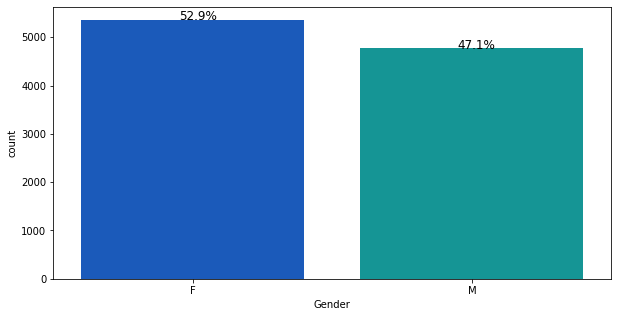

In [34]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(BC_df["Gender"], palette="winter")
perc_on_bar(ax, BC_df["Gender"])

- There are more female customers than male customers

### Observation on Education level

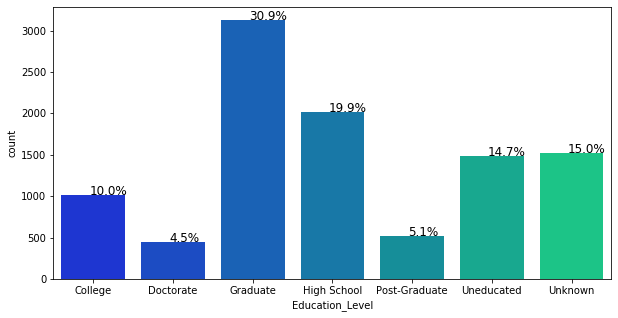

In [35]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(BC_df["Education_Level"], palette="winter")
perc_on_bar(ax, BC_df["Education_Level"])

- Most of customers are graduates(30%) and least are doctorate(4.5%)

### Observation on Marital status 

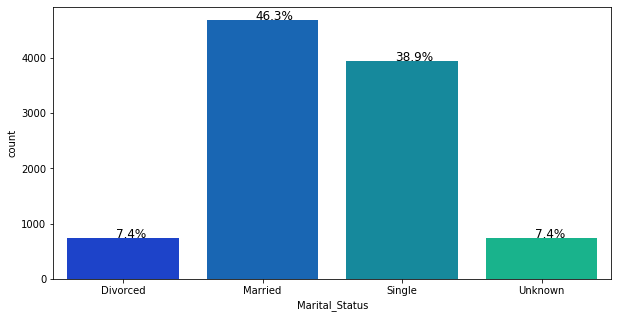

In [36]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(BC_df["Marital_Status"], palette="winter")
perc_on_bar(ax, BC_df["Marital_Status"])

- Most of Customers are married and least are divorced.

### Observation on Income Category

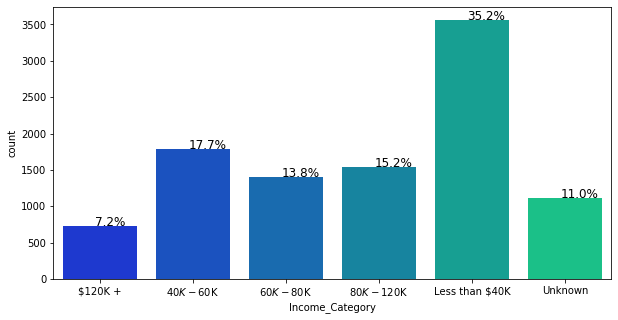

In [37]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(BC_df["Income_Category"], palette="winter")
perc_on_bar(ax, BC_df["Income_Category"])

- Most of customers are in income category less than $40000 range.

### Observation on Card Cateory 

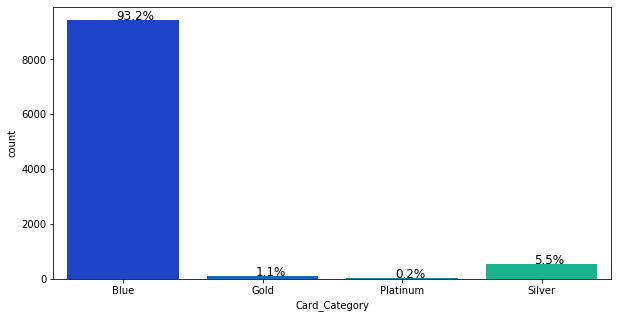

In [38]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(BC_df["Card_Category"], palette="winter")
perc_on_bar(ax, BC_df["Card_Category"])

- Most of customers are having Blue card which accounts to 93.2%
- Least have Platinum

### 1.5 Bivariate analysis 

Before we process data, lets take the graphical visualization of the data to understand better.

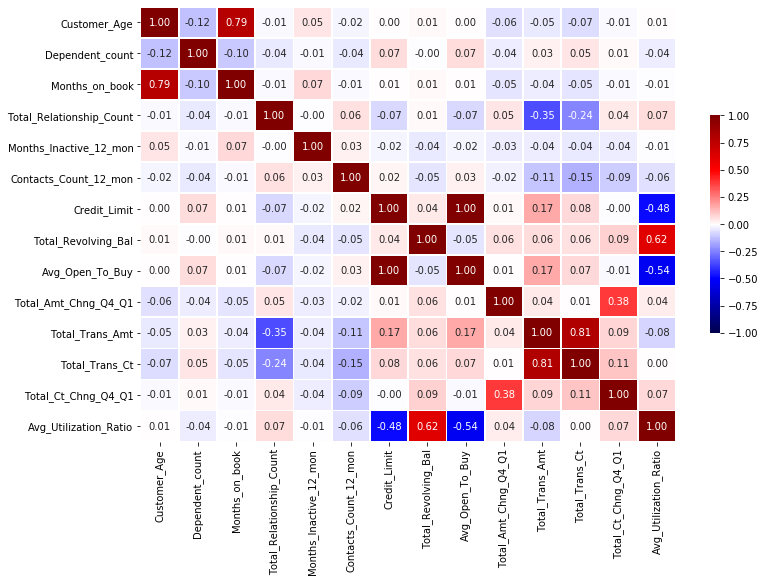

In [39]:
numeric_columns = BC_df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('CLIENTNUM') # dropping Client ID column 
corr = BC_df[numeric_columns].corr() # sorting correlations w.r.t life expectancy  


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".2f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

***Observations***

- Age and Months on book are very tightly positive correlated(0.79). As customers age increases, period of relationship with the bank
also increases.
- Average open to buy and credit limit are very tightly positive correlated(1.0).
- Total Revolving Balance on the Credit Card and Average Card Utilization Ratio are positvely correlated(0.62).
- Total Transaction Count and Total Transaction amount are positively correlated(0.81).
- There are some features having a negative correlation, 
    - Average Card Utilization Ratio and Credit limit.
    - Average Card Utilization Ratio and average open to buy.


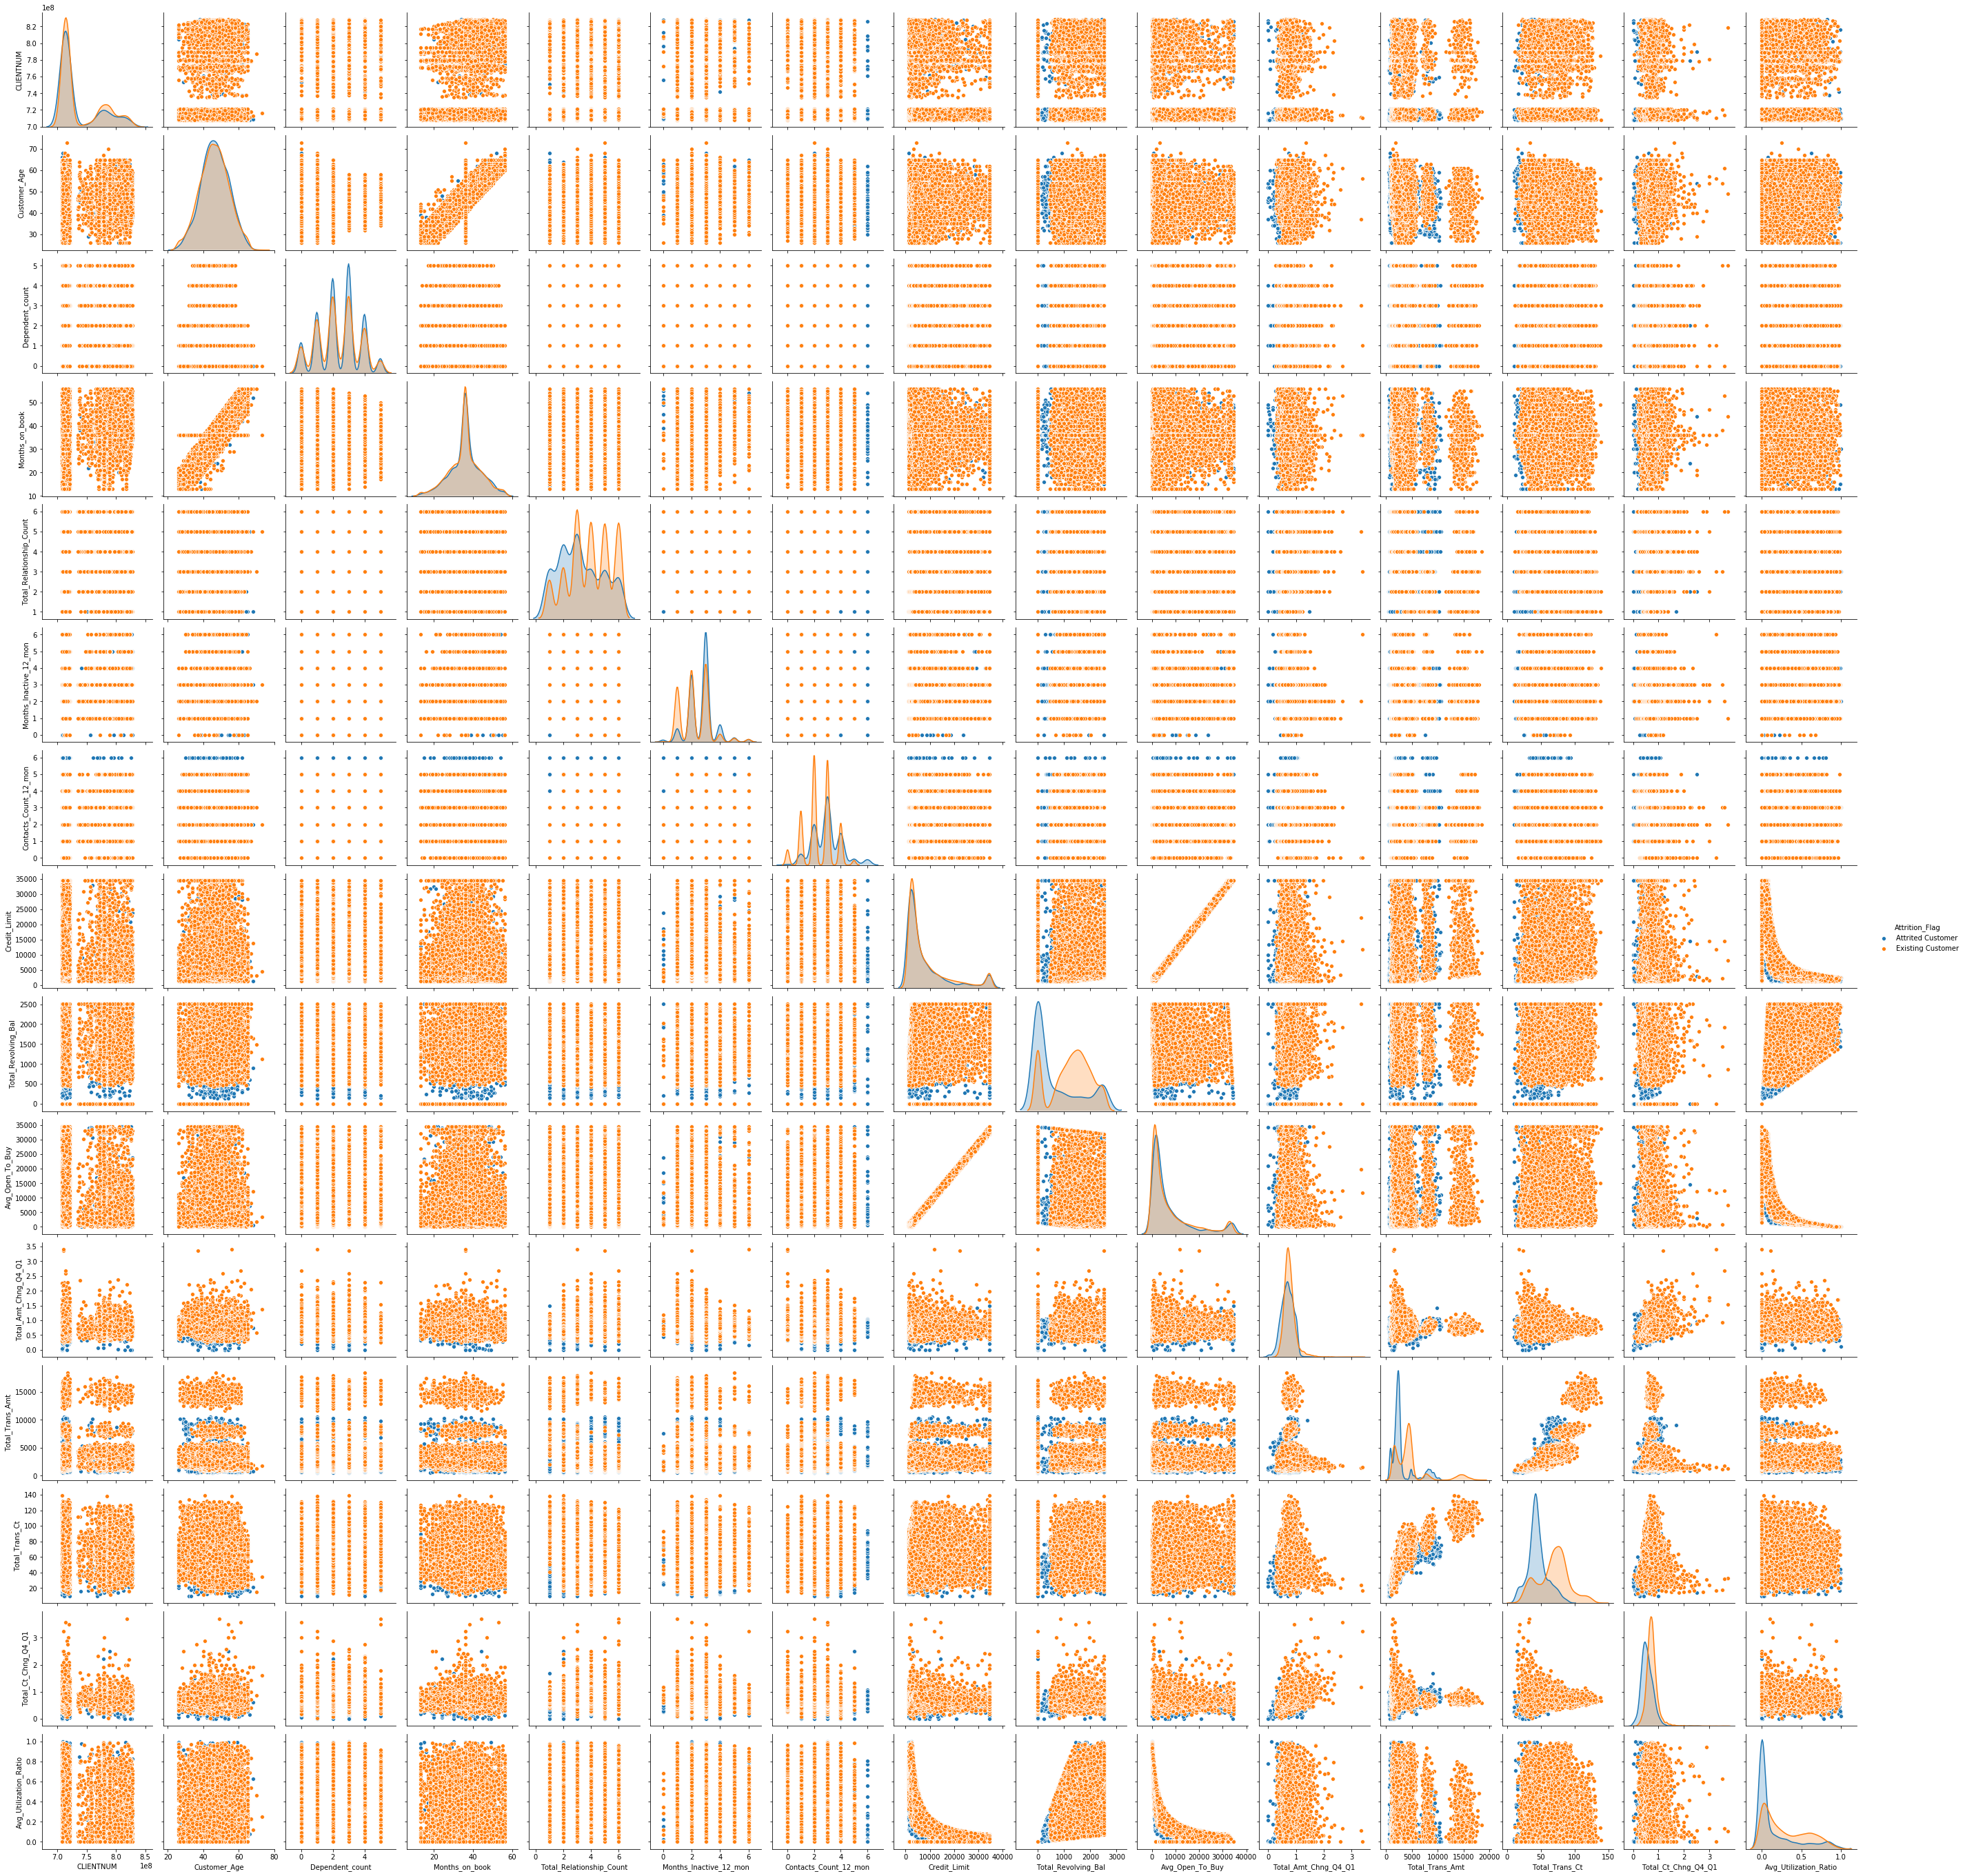

In [40]:
sns.pairplot(BC_df, hue="Attrition_Flag")
plt.show()

From pair plot,
- Average open to buy and credit limit are positive correlation.
- Customer Age and months on book are positive correlation.
- Total transaction amount and Total transaction count are positive correlation.

# 2. Illustrate the insights based on EDA

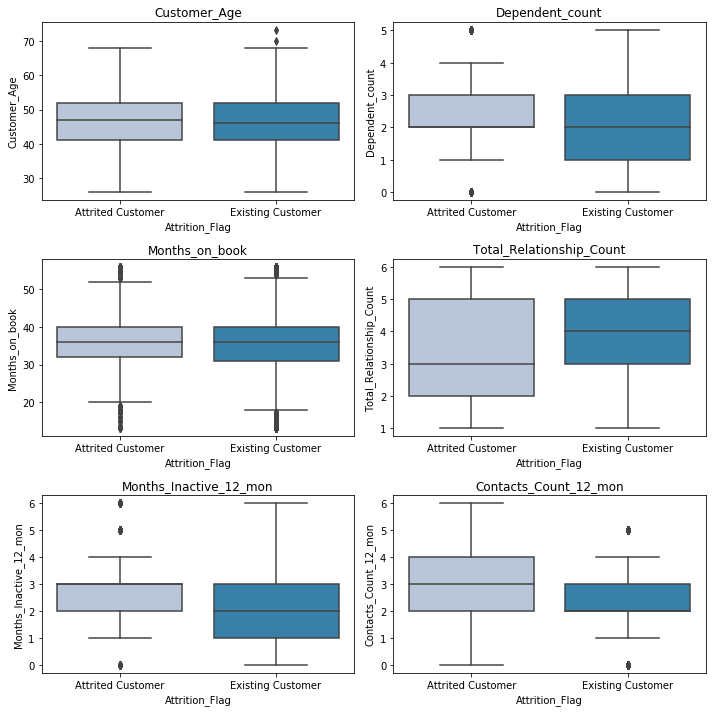

In [41]:
cols = BC_df[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
'Contacts_Count_12_mon']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(BC_df["Attrition_Flag"],BC_df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- some customers with dependents 2 and 3 have closed their accounts.
- some customers with months on book between 30 and 40 have closed their accounts.
- some customers with total relationship counts 3 to 5 have closed their accounts. 
  customers with counts 2 have closed the accounts
- some customers with months inactive for 2 to 3 have closed their accounts.
- some customers with contact counts 2 to 3 have closed their accounts. 
  customers with counts 4 have closed their accounts

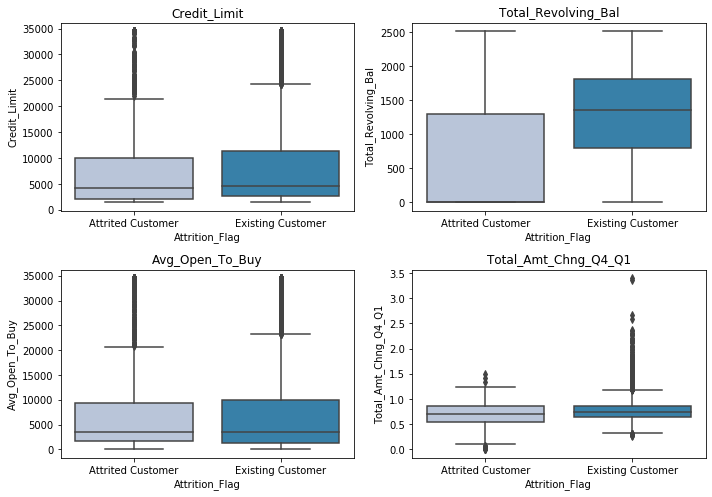

In [42]:
cols = BC_df[['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(BC_df["Attrition_Flag"],BC_df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- some customers with revolving balance zero to less than 1000 are attrited customers.

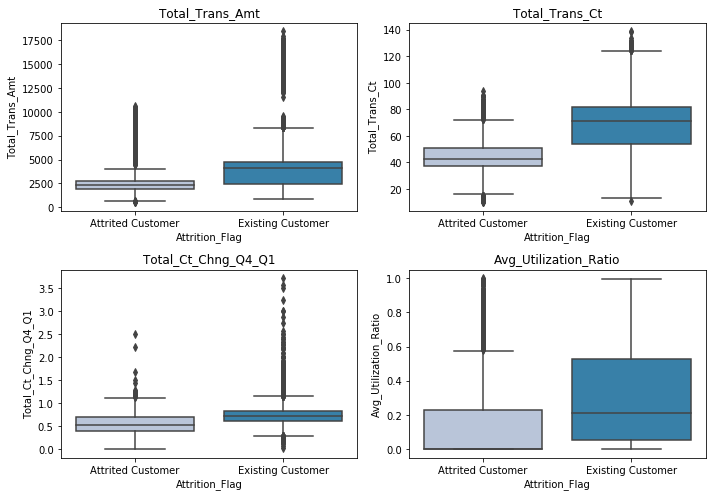

In [43]:
cols = BC_df[['Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(BC_df["Attrition_Flag"],BC_df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [44]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,BC_df['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,BC_df['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


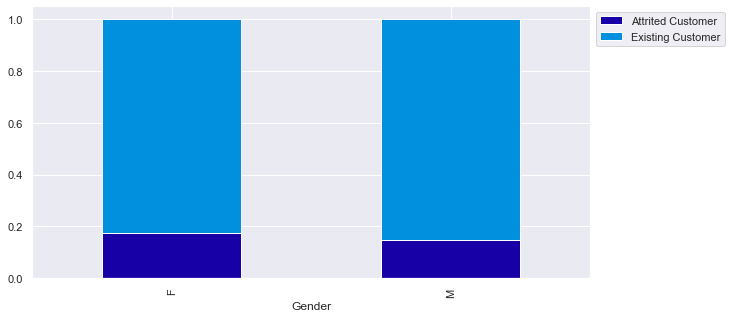

In [45]:
stacked_plot(BC_df['Gender'])

- 17% of Female has closed their accounts
- 14.6% of Male has closed their accounts

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


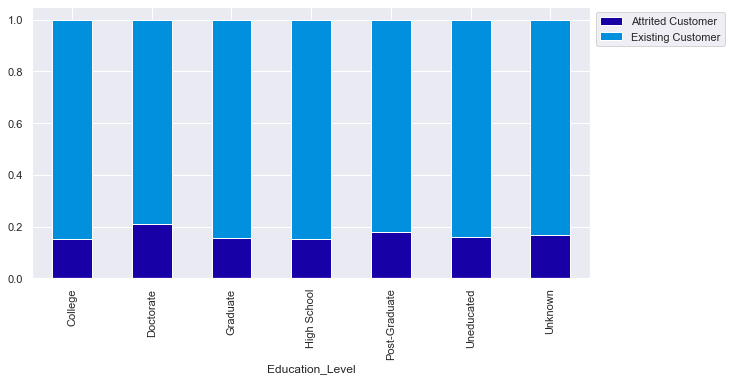

In [46]:
stacked_plot(BC_df['Education_Level'])

- Maximum 21% doctorates educated customers has closed their accounts
- Minimum 15% of college and hight school educated customers has closed their accounts

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


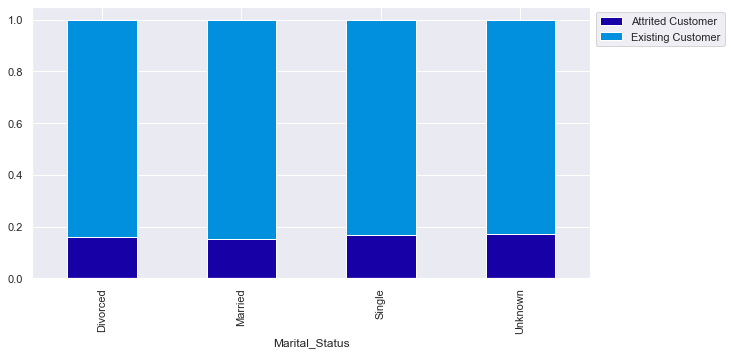

In [47]:
stacked_plot(BC_df['Marital_Status'])

- Maximum 17% Customer with marital status unknown has closed their accounts
- Minimum 15% Customer with marital status married has closed their accounts

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


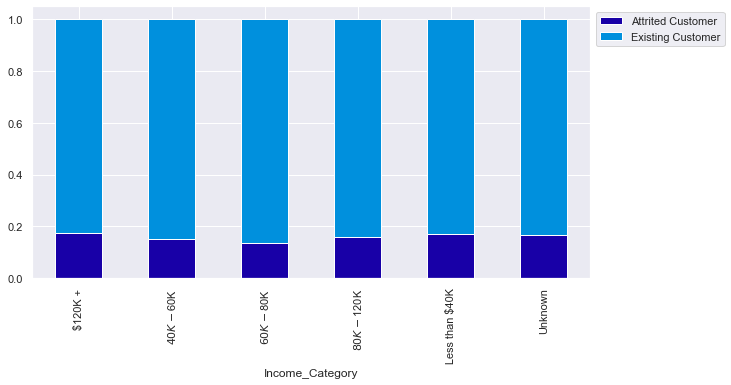

In [48]:
stacked_plot(BC_df['Income_Category'])

- Maximum 17% customers with income range 120k and above has closed the accounts
- Minimum 13% customers with income range 60k to 80khas closed the accounts

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


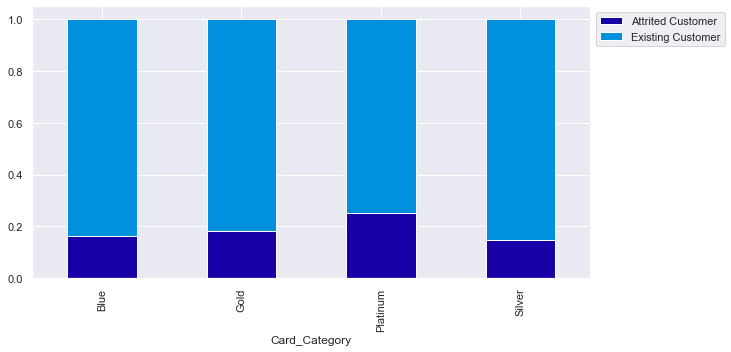

In [49]:
stacked_plot(BC_df['Card_Category'])

- Maximum 25% of customers with Platinum has closed their accounts
- Minimum 14% of customers with Silver has closed their accounts

# 3. Data pre-processing

### 3.1 Dropping columns which are not adding any information

In [50]:
# The Client ID is an ID variable and not useful for predictive modelling.So,Client ID is dropped.
BC_df.drop(['CLIENTNUM'],axis=1,inplace=True)

### 3.2 Encoding the variables for below features

In [51]:
# Encoding variables - Attrition_Flag and Checking account.
Attrition_Flag = {'Attrited Customer': 1, 'Existing Customer': 0}
BC_df['Attrition_Flag'] = BC_df['Attrition_Flag'].map(Attrition_Flag)

In [52]:
# To replace College as Graduates.
BC_df["Education_Level"].replace('College',"Graduate",inplace=True)

Education_Level = {"Uneducated": 1, "High School": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5, "Unknown": 0}
BC_df["Education_Level"] = BC_df["Education_Level"].map(Education_Level)


In [53]:
Marital_Status = {"Single": 1, "Married": 2, "Divorced": 3, "Unknown": 0}
BC_df["Marital_Status"] = BC_df["Marital_Status"].map(Marital_Status)

In [54]:
Income_Category = {"Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K": 4,"$120K +": 5, "Unknown": 0}
BC_df["Income_Category"] = BC_df["Income_Category"].map(Income_Category)

In [55]:
BC_df.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0              0            45      M                3               2   
1              0            49      F                5               3   
2              0            51      M                3               3   
3              0            40      F                4               2   
4              0            40      M                3               1   
5              0            44      M                2               3   
6              0            51      M                4               0   
7              0            32      M                0               2   
8              0            37      M                3               1   
9              0            48      M                2               3   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0              2               3          Blue              39   
1              1               1          Blue              44   
2              2               4          Blue              36   
3              0               1          Blue              34   
4              2               3          Blue              21   
5              2               2          Blue              36   
6              2               5          Gold              46   
7              0               3        Silver              27   
8              1               3          Blue              36   
9              1               4          Blue              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   
5                         3                       1                      2   
6                         6                       1                      3   
7                         2                       2                      2   
8                         5                       2                      0   
9                         6                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   
5      4010.000                 1247         2763.000                 1.376   
6     34516.000                 2264        32252.000                 1.975   
7     29081.000                 1396        27685.000                 2.204   
8     22352.000                 2517        19835.000                 3.355   
9     11656.000                 1677         9979.000                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36                0.714                  0.048  
8 

### 3.3 Outliers in every numerical column

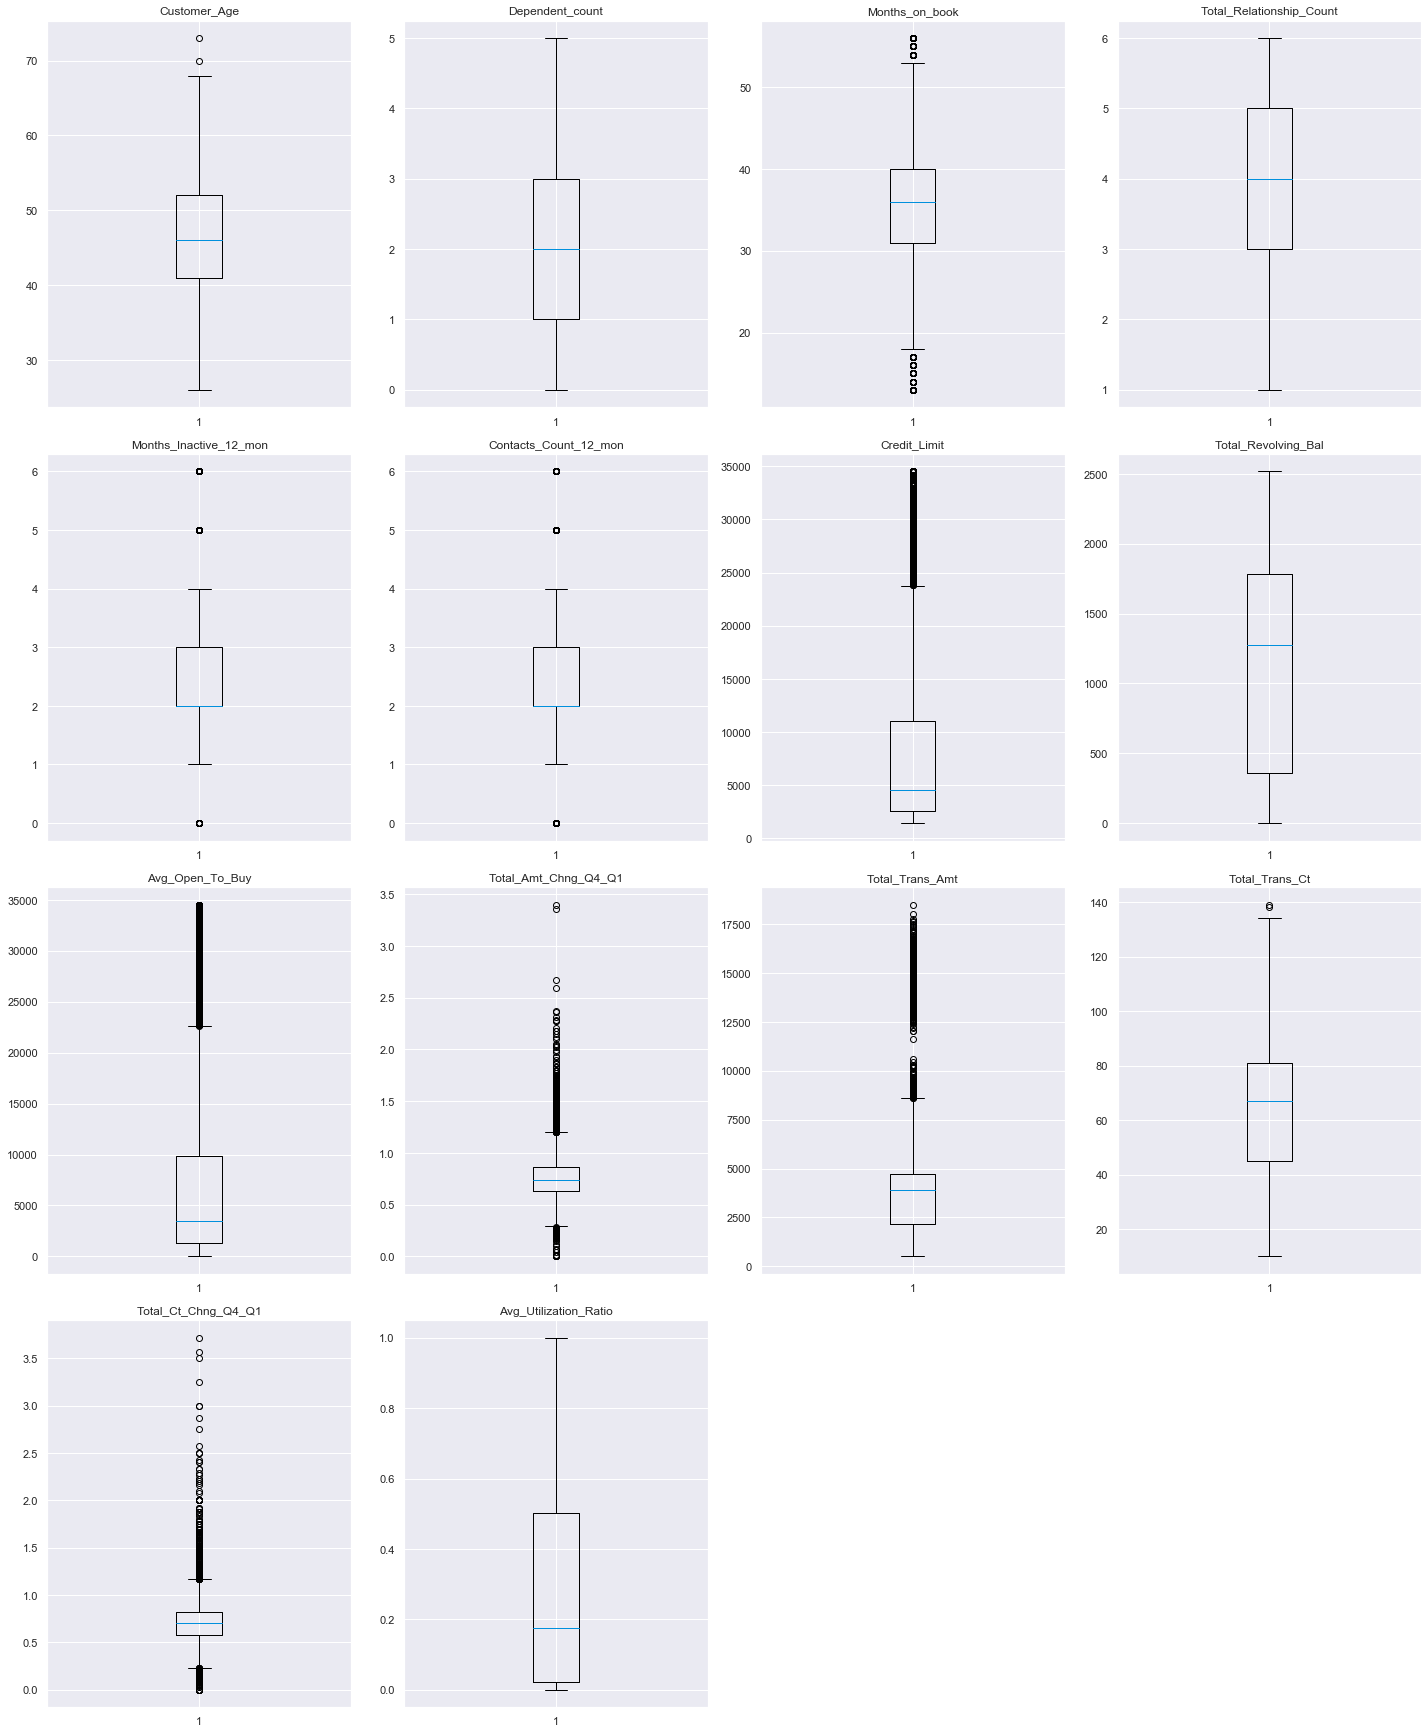

In [56]:
# outlier detection using boxplot
BC_df["Education_Level"] = BC_df["Education_Level"].astype("category")
numeric_columns = BC_df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(BC_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

***Number of Records in outliers(max and min) for each features are listed :***

In [57]:
print('Customer Age(max) :' ,(BC_df['Customer_Age'] > 
(BC_df['Customer_Age'].quantile(0.75) + (BC_df['Customer_Age'].quantile(0.75) - BC_df['Customer_Age'].quantile(0.25)) * 1.5)).sum())
print('Customer Age(min) :' ,(BC_df['Customer_Age'] < 
(BC_df['Customer_Age'].quantile(0.25) - (BC_df['Customer_Age'].quantile(0.75) - BC_df['Customer_Age'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')
print('Months_on_book(max) :' ,(BC_df['Months_on_book'] > 
(BC_df['Months_on_book'].quantile(0.75) + (BC_df['Months_on_book'].quantile(0.75) - BC_df['Months_on_book'].quantile(0.25)) * 1.5)).sum())
print('Months_on_book(min) :' ,(BC_df['Months_on_book'] < 
(BC_df['Months_on_book'].quantile(0.25) - (BC_df['Months_on_book'].quantile(0.75) - BC_df['Months_on_book'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')
print('Months_Inactive_12_mon(max) :' ,(BC_df['Months_Inactive_12_mon'] > 
(BC_df['Months_Inactive_12_mon'].quantile(0.75) + (BC_df['Months_Inactive_12_mon'].quantile(0.75) - BC_df['Months_Inactive_12_mon'].quantile(0.25)) * 1.5)).sum())
print('Months_Inactive_12_mon(min) :' ,(BC_df['Months_Inactive_12_mon'] < 
(BC_df['Months_Inactive_12_mon'].quantile(0.25) - (BC_df['Months_Inactive_12_mon'].quantile(0.75) - BC_df['Months_Inactive_12_mon'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')
print('Contacts_Count_12_mon(max) :' ,(BC_df['Contacts_Count_12_mon'] > 
(BC_df['Contacts_Count_12_mon'].quantile(0.75) + (BC_df['Contacts_Count_12_mon'].quantile(0.75) - BC_df['Contacts_Count_12_mon'].quantile(0.25)) * 1.5)).sum())
print('Contacts_Count_12_mon(min) :' ,(BC_df['Contacts_Count_12_mon'] < 
(BC_df['Contacts_Count_12_mon'].quantile(0.25) - (BC_df['Contacts_Count_12_mon'].quantile(0.75) - BC_df['Contacts_Count_12_mon'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')
print('Credit_Limit(max) :' ,(BC_df['Credit_Limit'] > 
(BC_df['Credit_Limit'].quantile(0.75) + (BC_df['Credit_Limit'].quantile(0.75) - BC_df['Credit_Limit'].quantile(0.25)) * 1.5)).sum())
print('Credit_Limit(min) :' ,(BC_df['Credit_Limit'] < 
(BC_df['Credit_Limit'].quantile(0.25) - (BC_df['Credit_Limit'].quantile(0.75) - BC_df['Credit_Limit'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')
print('Avg_Open_To_Buy(max) :' ,(BC_df['Avg_Open_To_Buy'] > 
(BC_df['Avg_Open_To_Buy'].quantile(0.75) + (BC_df['Avg_Open_To_Buy'].quantile(0.75) - BC_df['Avg_Open_To_Buy'].quantile(0.25)) * 1.5)).sum())
print('Avg_Open_To_Buy(min) :' ,(BC_df['Avg_Open_To_Buy'] < 
(BC_df['Avg_Open_To_Buy'].quantile(0.25) - (BC_df['Avg_Open_To_Buy'].quantile(0.75) - BC_df['Avg_Open_To_Buy'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')
print('Total_Amt_Chng_Q4_Q1(max) :' ,(BC_df['Total_Amt_Chng_Q4_Q1'] > 
(BC_df['Total_Amt_Chng_Q4_Q1'].quantile(0.75) + (BC_df['Total_Amt_Chng_Q4_Q1'].quantile(0.75) - BC_df['Total_Amt_Chng_Q4_Q1'].quantile(0.25)) * 1.5)).sum())
print('Total_Amt_Chng_Q4_Q1(min) :' ,(BC_df['Total_Amt_Chng_Q4_Q1'] < 
(BC_df['Total_Amt_Chng_Q4_Q1'].quantile(0.25) - (BC_df['Total_Amt_Chng_Q4_Q1'].quantile(0.75) - BC_df['Total_Amt_Chng_Q4_Q1'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')
print('Total_Trans_Amt(max) :' ,(BC_df['Total_Trans_Amt'] > 
(BC_df['Total_Trans_Amt'].quantile(0.75) + (BC_df['Total_Trans_Amt'].quantile(0.75) - BC_df['Total_Trans_Amt'].quantile(0.25)) * 1.5)).sum())
print('Total_Trans_Amt(min) :' ,(BC_df['Total_Trans_Amt'] < 
(BC_df['Total_Trans_Amt'].quantile(0.25) - (BC_df['Total_Trans_Amt'].quantile(0.75) - BC_df['Total_Trans_Amt'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')
print('Total_Trans_Ct(max) :' ,(BC_df['Total_Trans_Ct'] > 
(BC_df['Total_Trans_Ct'].quantile(0.75) + (BC_df['Total_Trans_Ct'].quantile(0.75) - BC_df['Total_Trans_Ct'].quantile(0.25)) * 1.5)).sum())
print('Total_Trans_Ct(min) :' ,(BC_df['Total_Trans_Ct'] < 
(BC_df['Total_Trans_Ct'].quantile(0.25) - (BC_df['Total_Trans_Ct'].quantile(0.75) - BC_df['Total_Trans_Ct'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')
print('Total_Ct_Chng_Q4_Q1(max) :' ,(BC_df['Total_Ct_Chng_Q4_Q1'] > 
(BC_df['Total_Ct_Chng_Q4_Q1'].quantile(0.75) + (BC_df['Total_Ct_Chng_Q4_Q1'].quantile(0.75) - BC_df['Total_Ct_Chng_Q4_Q1'].quantile(0.25)) * 1.5)).sum())
print('Total_Ct_Chng_Q4_Q1(min) :' ,(BC_df['Total_Ct_Chng_Q4_Q1'] < 
(BC_df['Total_Ct_Chng_Q4_Q1'].quantile(0.25) - (BC_df['Total_Ct_Chng_Q4_Q1'].quantile(0.75) - BC_df['Total_Ct_Chng_Q4_Q1'].quantile(0.25)) * 1.5)).sum()
)
print('----------------------------------------------------------------------')

Customer Age(max) : 2
Customer Age(min) : 0
----------------------------------------------------------------------
Months_on_book(max) : 198
Months_on_book(min) : 188
----------------------------------------------------------------------
Months_Inactive_12_mon(max) : 302
Months_Inactive_12_mon(min) : 29
----------------------------------------------------------------------
Contacts_Count_12_mon(max) : 230
Contacts_Count_12_mon(min) : 399
----------------------------------------------------------------------
Credit_Limit(max) : 984
Credit_Limit(min) : 0
----------------------------------------------------------------------
Avg_Open_To_Buy(max) : 963
Avg_Open_To_Buy(min) : 0
----------------------------------------------------------------------
Total_Amt_Chng_Q4_Q1(max) : 348
Total_Amt_Chng_Q4_Q1(min) : 47
----------------------------------------------------------------------
Total_Trans_Amt(max) : 896
Total_Trans_Amt(min) : 0
-------------------------------------------------------------

There are some Outliers in numerical field as seen above. The number of Outlier records in each features in both upper and lower whiskers are listed above. 
After checking the above outlier records, 
- Some features has less outlier records
- Some have more outlier records in both upper and lower part of distribution.

So, we will be treating the outliers. The Outliers need to be treated inorder to get a better model. 

### 3.4 Outliers treatment.

In [58]:
# Lets treat outliers by flooring and capping
def treat_outliers(BC_df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=BC_df[col].quantile(0.25) # 25th quantile
    Q3=BC_df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    BC_df[col] = np.clip(BC_df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return BC_df

def treat_outliers_all(BC_df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        BC_df = treat_outliers(BC_df,c)
        
    return BC_df
    

In [59]:
#Treating the outiers
numerical_col = BC_df.select_dtypes(include=np.number).columns.tolist()
BC_df = treat_outliers_all(BC_df,numerical_col)

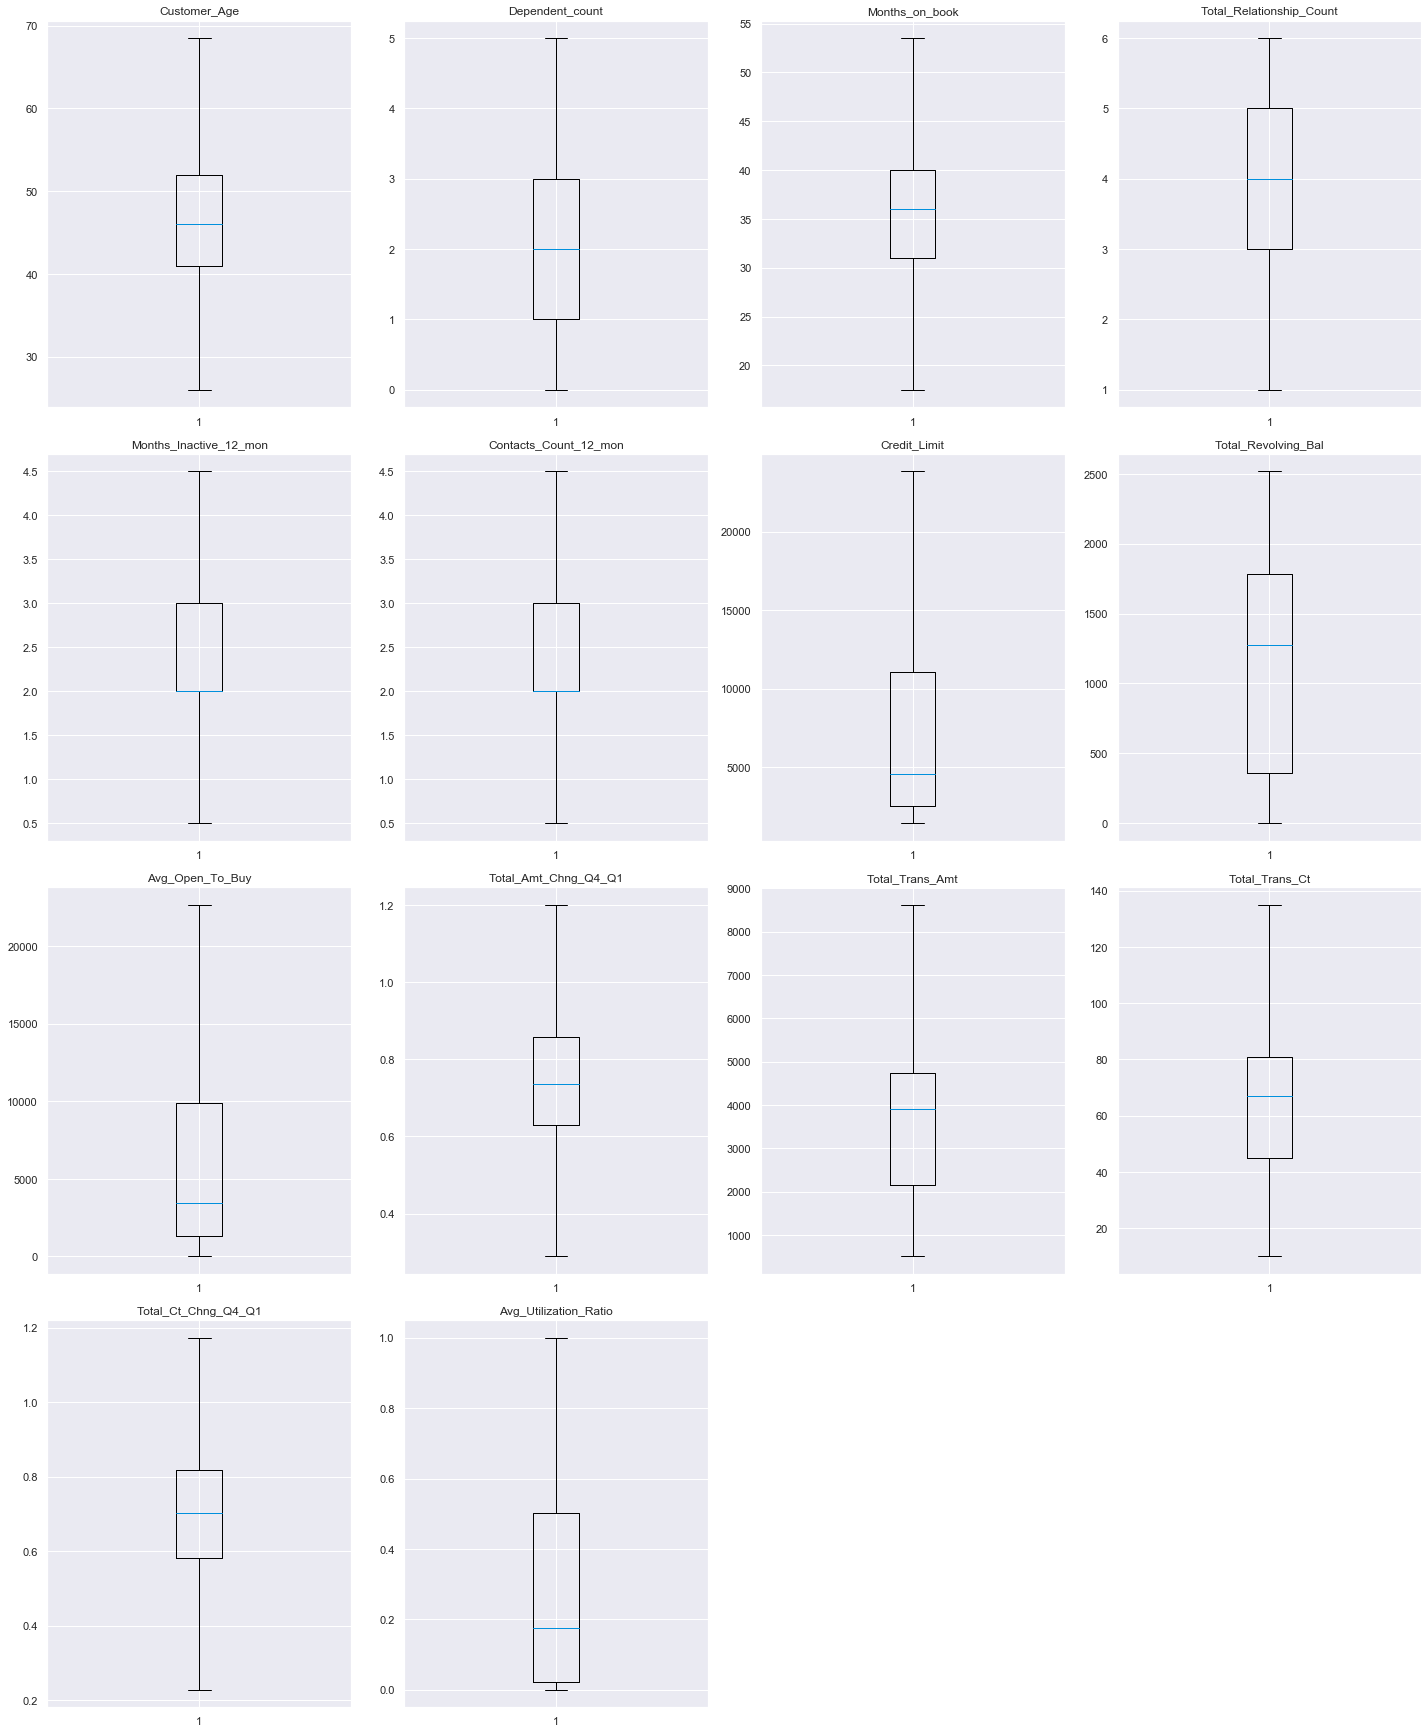

In [60]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(BC_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

****Outliers have been treated****

### 3.5 Missing value treatment i.e Unknown in feature - Education_Level, Marital_Status, Income_Category

***3.5.1 To use KNN imputer to impute missing values.***

***Split data***

In [61]:
BC_df['Education_Level'].replace(0, np.nan, inplace=True)
BC_df['Marital_Status'].replace(0, np.nan, inplace=True)
BC_df['Income_Category'].replace(0, np.nan, inplace=True)

In [62]:
X = BC_df.drop(["Attrition_Flag"], axis=1)
y = BC_df["Attrition_Flag"]

In [63]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [64]:
# Creating a list of columns with missing values
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [65]:
imputer = KNNImputer(n_neighbors=5)

In [66]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [67]:
# As KNNImputer replaces the missing value with the mean of K nearest neighbours, we will roundoff those values
X_train[reqd_col_for_impute] = np.round(X_train[reqd_col_for_impute])
X_test[reqd_col_for_impute] = np.round(X_test[reqd_col_for_impute])

In [68]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [69]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [70]:
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Income_Category,'Income_Category')

In [71]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3684
High School      1697
Uneducated       1031
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3598
Single      2988
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2549
$40K - $60K       1638
$60K - $80K       1314
$80K - $120K      1084
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


### 3.6 Encoding categorical varaibles

In [72]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 28) (3039, 28)


- After KNN imputation on missing valies and get dummies on categorical variables, the data is now ready for modeling. 

# 4. Model building - Logistic Regression

### 4.1 To build a model 

In [73]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [74]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 4.2 Logistic Regression 

In [75]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

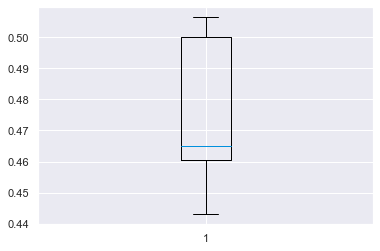

In [76]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Accuracy on training set :  0.8854401805869074
Accuracy on test set :  0.8920697597894044
Recall on training set :  0.4784899034240562
Recall on test set :  0.514344262295082
Precision on training set :  0.7142857142857143
Precision on test set :  0.7339181286549707


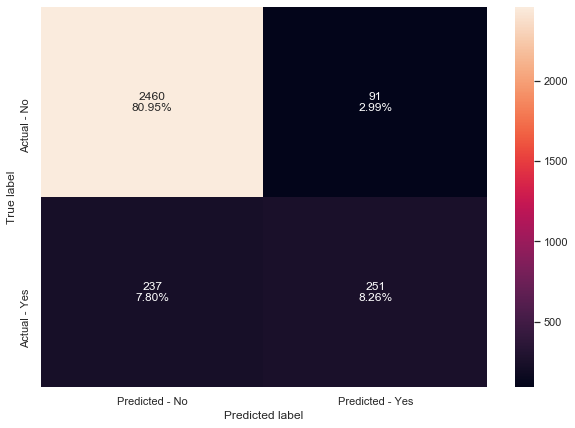

In [77]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

### Oversampling train data using SMOTE

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 28)
After UpSampling, the shape of train_y: (11898,) 



### Logistic Regression on oversampled data

In [80]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

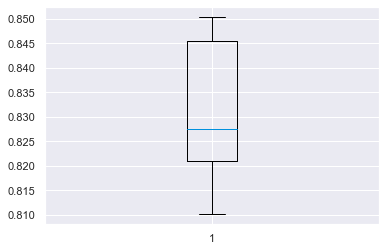

In [81]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

Accuracy on training set :  0.83761976802824
Accuracy on test set :  0.8124383020730503
Recall on training set :  0.8411497730711044
Recall on test set :  0.7930327868852459
Precision on training set :  0.8352528793189785
Precision on test set :  0.45210280373831774


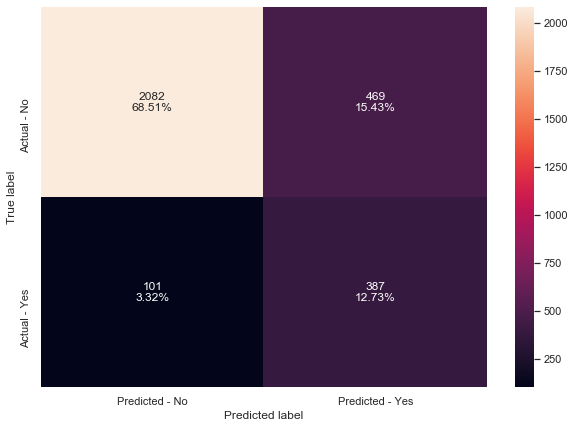

In [82]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

### Regularization

In [83]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7215498403092957
Accuracy on test set :  0.7716354063836789
Recall on training set :  0.630526138846865
Recall on test set :  0.5840163934426229
Precision on training set :  0.770859021783806
Precision on test set :  0.36726804123711343


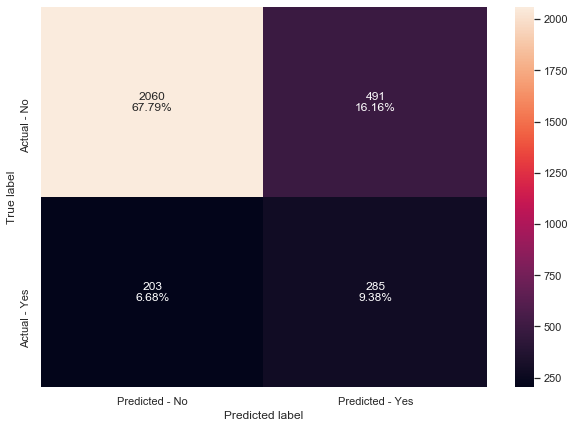

In [84]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

### Undersampling train data using SMOTE

In [85]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [86]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 28)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [87]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

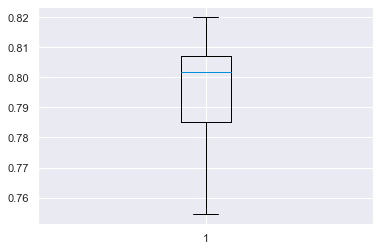

In [88]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Accuracy on training set :  0.8050921861281826
Accuracy on test set :  0.8002632444883185
Recall on training set :  0.800702370500439
Recall on test set :  0.8012295081967213
Precision on training set :  0.8077945084145262
Precision on test set :  0.4339622641509434


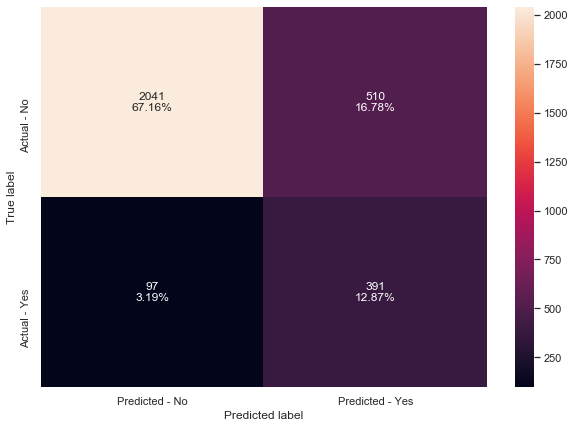

In [89]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

In [90]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [91]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [92]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [93]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression           0.885   
1            Logistic Regression on Oversampled data           0.838   
2  Logistic Regression-Regularized (Oversampled d...           0.722   
3           Logistic Regression on Undersampled data           0.805   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0          0.892         0.478        0.514            0.714           0.734  
1          0.812         0.841        0.793            0.835           0.452  
2          0.772         0.631        0.584            0.771           0.367  
3          0.800         0.801        0.801            0.808           0.434

* Logistic regression model on undersampled data has given a generalized performance with the highest recall on test data.

### Finding the coefficients

In [94]:
log_odds = log_reg_under.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef']).T

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
coef         0.142            0.198          -0.088                    -0.082   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
coef                   0.209                  0.275        -0.000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
coef               -0.001            0.000                 0.003  ...   

      Education_Level_Uneducated  Marital_Status_Married  \
coef                       0.004                  -0.015   

      Marital_Status_Single  Income_Category_$40K - $60K  \
coef                  0.047                        0.018   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
coef                       -0.007                        -0.005   

      Income_Category_Less than $40K  Card_Category_Gold  \
coef                           0.037               0.002   

      Card_Category_Platinum  Card_Category_Silver  
coef                   0.001                 0.002  

[1 rows x 28 columns]

### Coefficient interpretations

* Coefficient of Customer_Age, Dependent_count, Months_Inactive_12_mon, Contacts_Count_12_mon etc are positive, increase in these will lead to an increase in chances of a person leave their credit card services.  
* Coefficient of Months_on_book, Total_Relationship_Count etc are negative increase in these will lead to a decrease in chances of a person leave their credit card services. 

###  Converting coefficients to odds

* Odds from coefficients

In [95]:
odds = np.exp(log_reg_under.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
odds         1.153            1.218           0.916                     0.922   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
odds                   1.233                  1.316         1.000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
odds                0.999            1.000                 1.003   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
odds            1.001           0.884                0.976   

      Avg_Utilization_Ratio  Gender_M  Education_Level_Graduate  \
odds                  1.003     0.978                     1.018   

      Education_Level_High School  Education_Level_Post-Graduate  \
odds                        1.002                          1.010   

      Education_Level_Uneducated  Marital_Status_Married  \
odds                       1.004                   0.985   

      Marital_Status_Single  Income_Category_$40K - $60K  \
odds                  1.048                        1.019   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
odds                        0.993                         0.995   

      Income_Category_Less than $40K  Card_Category_Gold  \
odds                           1.038               1.002   

      Card_Category_Platinum  Card_Category_Silver  
odds                   1.001                 1.002

* Percentage change in odds

In [96]:
perc_change_odds = (np.exp(log_reg_under.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

Customer_Age  Dependent_count  Months_on_book  \
change_odds%        15.285           21.843          -8.396   

              Total_Relationship_Count  Months_Inactive_12_mon  \
change_odds%                    -7.830                  23.302   

              Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
change_odds%                 31.628        -0.019               -0.063   

              Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
change_odds%            0.017                 0.338            0.079   

              Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
change_odds%         -11.597               -2.449                  0.256   

              Gender_M  Education_Level_Graduate  Education_Level_High School  \
change_odds%    -2.204                     1.779                        0.156   

              Education_Level_Post-Graduate  Education_Level_Uneducated  \
change_odds%                          1.020                       0.375   

              Marital_Status_Married  Marital_Status_Single  \
change_odds%                  -1.534                  4.767   

              Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
change_odds%                        1.852                       -0.688   

              Income_Category_$80K - $120K  Income_Category_Less than $40K  \
change_odds%                        -0.535                           3.764   

              Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
change_odds%               0.197                   0.140                 0.202

# 5. Model building - Bagging and Boosting

In [97]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # to display numbers in digits
y.value_counts(1)

0   0.84
1   0.16
Name: Attrition_Flag, dtype: float64

### Building Bagging Models with default parameters:

### 5.1 Decision Tree

In [98]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.16,1:0.84},random_state=1)

In [99]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, random_state=1)

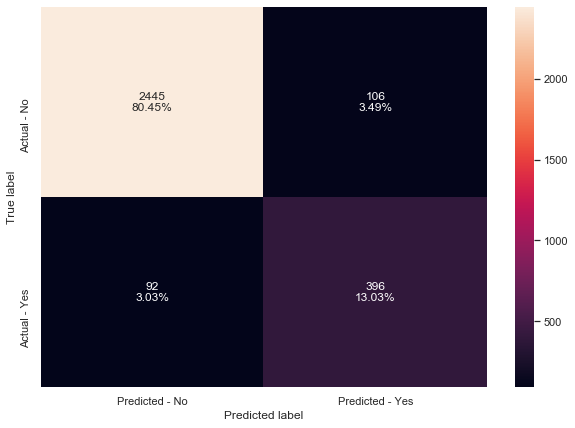

In [100]:
make_confusion_matrix(dtree,y_test)

In [101]:
get_metrics_score(dtree,X_train,X_test,y_train,y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.9348469891411648
Recall on training set :  1.0
Recall on test set :  0.8114754098360656
Precision on training set :  1.0
Precision on test set :  0.7888446215139442


[1.0, 0.9348469891411648, 1.0, 0.8114754098360656, 1.0, 0.7888446215139442]

### 5.2 Bagging Classifier

In [102]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

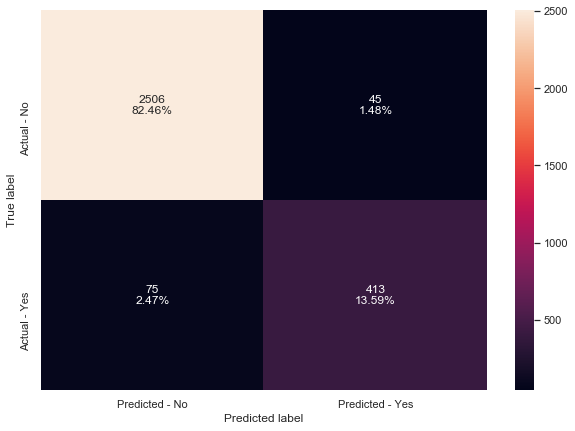

In [103]:
make_confusion_matrix(bagging,y_test)

In [104]:
get_metrics_score(bagging,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9960496613995485
Accuracy on test set :  0.9605133267522211
Recall on training set :  0.9789288849868305
Recall on test set :  0.8463114754098361
Precision on training set :  0.9964253798033958
Precision on test set :  0.9017467248908297


[0.9960496613995485,
 0.9605133267522211,
 0.9789288849868305,
 0.8463114754098361,
 0.9964253798033958,
 0.9017467248908297]

### 5.3 Random Forest

In [105]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

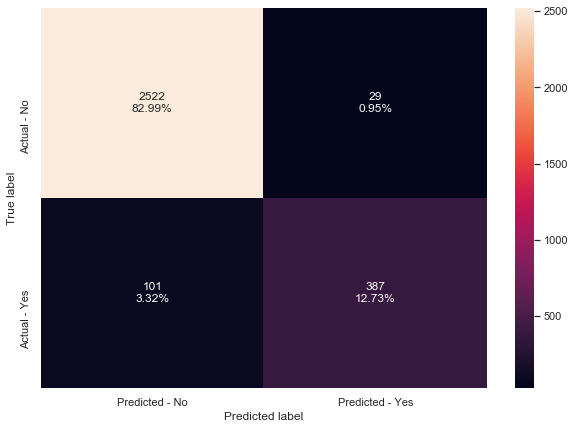

In [106]:
make_confusion_matrix(rf,y_test)

In [107]:
get_metrics_score(rf,X_train,X_test,y_train,y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.9572227706482396
Recall on training set :  1.0
Recall on test set :  0.7930327868852459
Precision on training set :  1.0
Precision on test set :  0.9302884615384616


[1.0, 0.9572227706482396, 1.0, 0.7930327868852459, 1.0, 0.9302884615384616]

### Building Boosting Models with default parameters:

### 5.4 AdaBoost Classifier

In [108]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

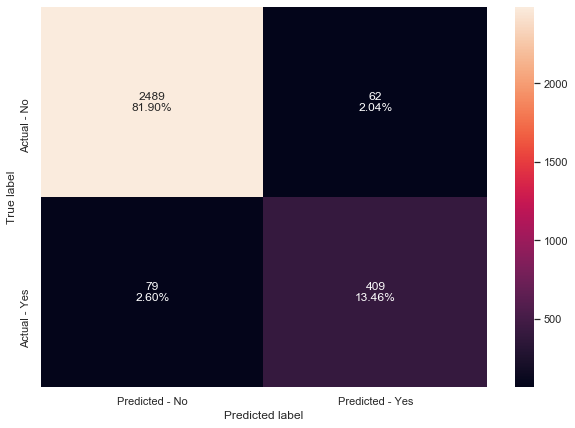

In [109]:
make_confusion_matrix(abc,y_test)

In [110]:
get_metrics_score(abc,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9576749435665914
Accuracy on test set :  0.9536031589338598
Recall on training set :  0.839332748024583
Recall on test set :  0.8381147540983607
Precision on training set :  0.8909599254426841
Precision on test set :  0.8683651804670913


[0.9576749435665914,
 0.9536031589338598,
 0.839332748024583,
 0.8381147540983607,
 0.8909599254426841,
 0.8683651804670913]

### 5.5 Gradient Boosting Classifier

In [111]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

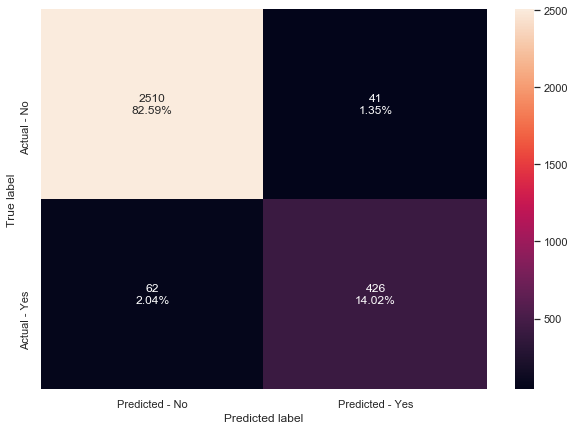

In [112]:
make_confusion_matrix(gbc,y_test)

In [113]:
get_metrics_score(gbc,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9753103837471784
Accuracy on test set :  0.9661072721289898
Recall on training set :  0.887620719929763
Recall on test set :  0.8729508196721312
Precision on training set :  0.9555765595463138
Precision on test set :  0.9122055674518201


[0.9753103837471784,
 0.9661072721289898,
 0.887620719929763,
 0.8729508196721312,
 0.9555765595463138,
 0.9122055674518201]

### 5.6 XGBoost Classifier

In [114]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

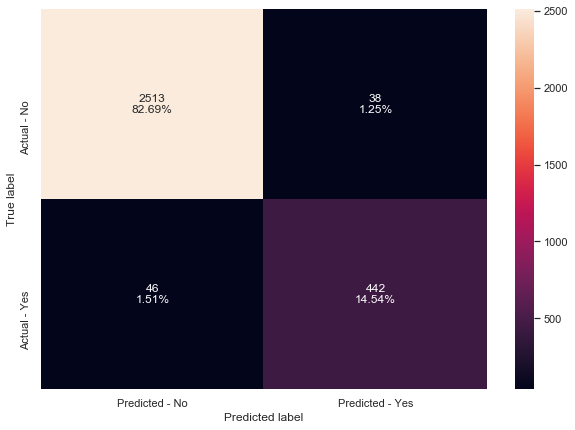

In [115]:
make_confusion_matrix(xgb,y_test)

In [116]:
get_metrics_score(xgb,X_train,X_test,y_train,y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.9723593287265548
Recall on training set :  1.0
Recall on test set :  0.9057377049180327
Precision on training set :  1.0
Precision on test set :  0.9208333333333333


[1.0, 0.9723593287265548, 1.0, 0.9057377049180327, 1.0, 0.9208333333333333]

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will leave their credit card services and the customer doesn't leave - Loss of resources
2. Predicting a customer will not leave their credit card services and the customer leaves - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not leave their credit card services but he leaves 
 i.e. losing on a potential source of income for the Bank because that customer will not be targeted by the bank team 
    when he should be targeted not to renounce the credit card.

#### How to reduce this loss i.e need to reduce False Negatives?
* Bank wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [117]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "BAG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("Bagging_class", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 78.7529948218564
RF: 78.13625473375068
BAG: 82.26369889481413
GBM: 83.84341912048845
ADB: 82.61650823092974
XGB: 86.3026509003787


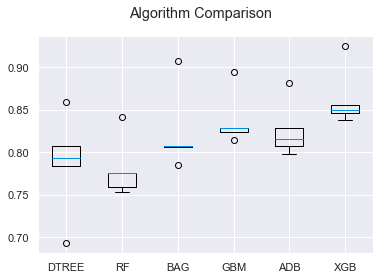

In [118]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost, AdaBoost, Gradient boosting and bagging classifer models is giving the highest cross-validated recall above 80%
- The boxplot shows that the performance of XGBoost, AdaBoost, Gradient boosting and bagging classifer is consistent with outliers.
- We will tune 3 models - We choose XGBoost, AdaBoost from boosting model and bagging classifer from bagging model to
see if the performance improves. 

# 6. Hyperparameter Tuning - grid search

## GridSearchCV

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [119]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_scores(model, flag=True):
    """
    model: classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [120]:
## Function to create confusion matrix
def make_confusion_matrixs(model, y_actual, labels=[1, 0]):
    """
    model: classifier to predict values of X
    y_actual: ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### 6.1 XGBoost - GridSearchCV

In [63]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.8} with CV score=0.9517118788159827:
Wall time: 1h 14min 17s


In [121]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=250,
        scale_pos_weight=10,
        subsample=0.8,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=0, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9507618510158014
Accuracy on test set :  0.9282658769332017
Recall on training set :  0.9973661106233538
Recall on test set :  0.9549180327868853
Precision on training set :  0.766531713900135
Precision on test set :  0.7039274924471299


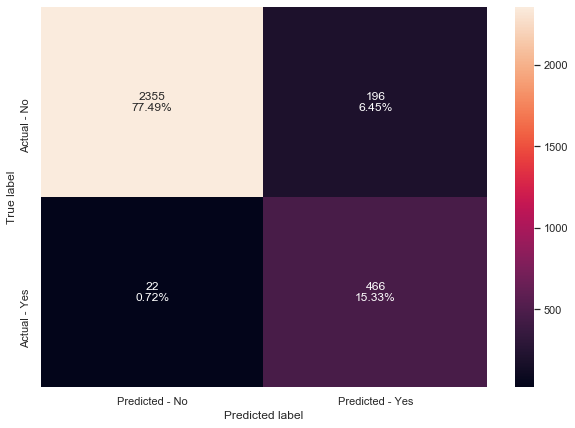

In [122]:
# Calculating different metrics
get_metrics_scores(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrixs(xgb_tuned1, y_test)

- The test recall has increased by ~9% as compared to cross-validated recall.
- The test recall is 0.95% i.e. the model is good at identifying potential customers who would leave their credit card services. 

### 6.2 AdaBoost - GridSearchCV

In [64]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__n_estimators': 80} 
Score: 0.8753535821933689


In [123]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=80,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=80,
                                    random_state=1))])

Accuracy on training set :  0.9891365688487584
Accuracy on test set :  0.970714050674564
Recall on training set :  0.9587357330992098
Recall on test set :  0.8975409836065574
Precision on training set :  0.9732620320855615
Precision on test set :  0.9182389937106918


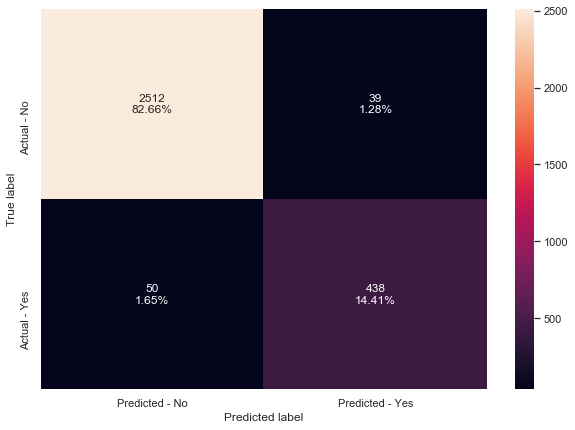

In [124]:
# Calculating different metrics
get_metrics_scores(abc_tuned1)

# Creating confusion matrix
make_confusion_matrixs(abc_tuned1, y_test)

- The test recall has increased by ~7% as compared to cross-validated recall.
- The test recall is 0.89 i.e. the model is good at identifying potential customers who would leave their credit card services. 

### 6.3 Bagging Classifer - GridSearchCV

In [106]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "baggingclassifier__n_estimators": np.arange(10, 110, 10),
    "baggingclassifier__max_features": [0.7,0.8,0.9,1],
    "baggingclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'baggingclassifier__max_features': 0.9, 'baggingclassifier__n_estimators': 10} 
Score: 0.7225558389365484


In [125]:
# Creating new pipeline with best parameters
bag_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=10,
        max_features=0.9,
        random_state=1,
    ),
)

# Fit the model on training data
bag_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                         random_state=1),
                                   max_features=0.9, random_state=1))])

Accuracy on training set :  0.9200056433408578
Accuracy on test set :  0.9128002632444883
Recall on training set :  0.7181738366988587
Recall on test set :  0.7192622950819673
Precision on training set :  0.768796992481203
Precision on test set :  0.732776617954071


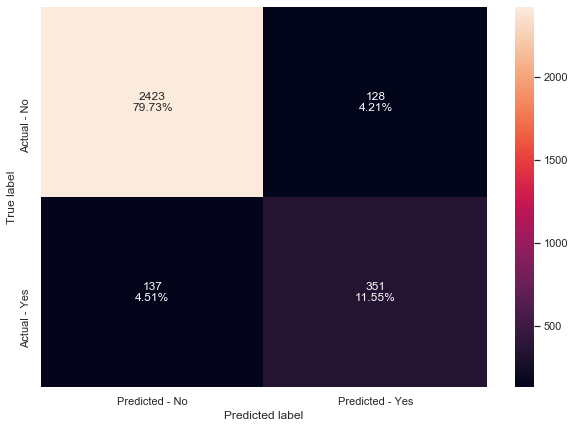

In [126]:
# Calculating different metrics
get_metrics_scores(bag_tuned1)

# Creating confusion matrix
make_confusion_matrixs(bag_tuned1, y_test)

- The test recall has not improved as compared to cross-validated recall.
- The model is not good at identifying potential customers who would leave their credit card services. 

# 7. Hyperparameter Tuning - Random search

## RandomizedSearchCV

### 7.1 XGBoost - RandomizedSearchCV 

In [73]:
#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 5} with CV score=0.9455599350799908:


In [127]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                learning_rate=0.05,
                gamma=5,
                subsample=1,
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=0, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9521726862302483
Accuracy on test set :  0.9282658769332017
Recall on training set :  0.9982440737489026
Recall on test set :  0.9528688524590164
Precision on training set :  0.771370420624152
Precision on test set :  0.7045454545454546


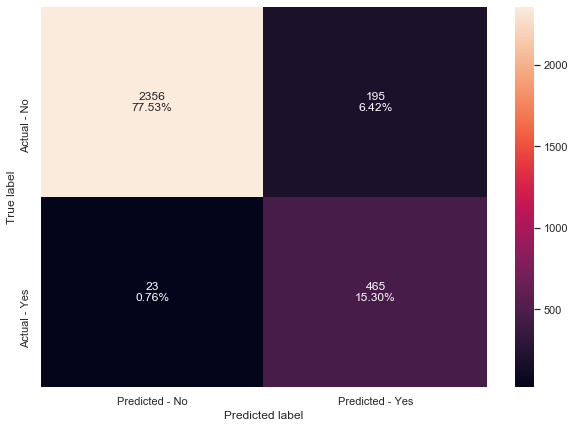

In [128]:
# Calculating different metrics
get_metrics_scores(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrixs(xgb_tuned2, y_test)

- The test recall has increased by ~9% as compared to cross-validated recall.
- The test recall is 0.95% i.e. the model is good at identifying potential customers who would leave their credit card services. 

### 7.2 Adaboost - RandomizedSearchCV 

In [112]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8683205811886545:


In [129]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=90,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.991676072234763
Accuracy on test set :  0.9726883843369529
Recall on training set :  0.9692712906057945
Recall on test set :  0.9057377049180327
Precision on training set :  0.9787234042553191
Precision on test set :  0.9227557411273486


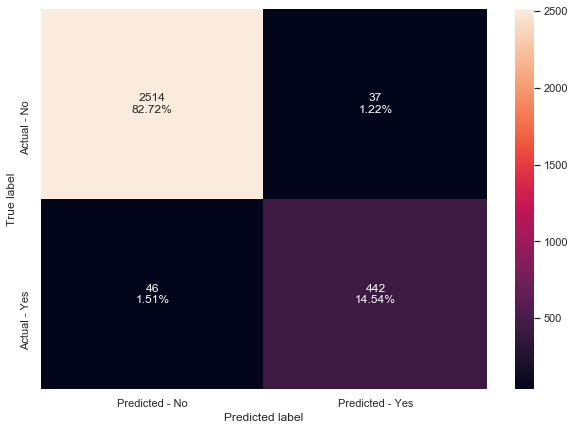

In [130]:
# Calculating different metrics
get_metrics_scores(abc_tuned2)

# Creating confusion matrix
make_confusion_matrixs(abc_tuned2, y_test)

- The test recall has increased by ~8% as compared to cross-validated recall.
- The test recall is 0.90 i.e. the model is good at identifying potential customers who would leave their credit card services. 

### 7.3 BaggingClassifier - RandomizedSearchCV 

In [109]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "baggingclassifier__n_estimators": np.arange(10, 110, 10),
    "baggingclassifier__max_features": [0.7,0.8,0.9,1],
    "baggingclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 90, 'baggingclassifier__max_features': 0.9, 'baggingclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7137916376845196:


In [131]:
# Creating new pipeline with best parameters
bag_tuned2 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=90,
        max_features=0.9,
        random_state=1,
    ),
)

# Fit the model on training data
bag_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                         random_state=1),
                                   max_features=0.9, n_estimators=90,
                                   random_state=1))])

Accuracy on training set :  0.9205699774266366
Accuracy on test set :  0.9134583744652847
Recall on training set :  0.7208077260755048
Recall on test set :  0.7192622950819673
Precision on training set :  0.7701688555347092
Precision on test set :  0.7358490566037735


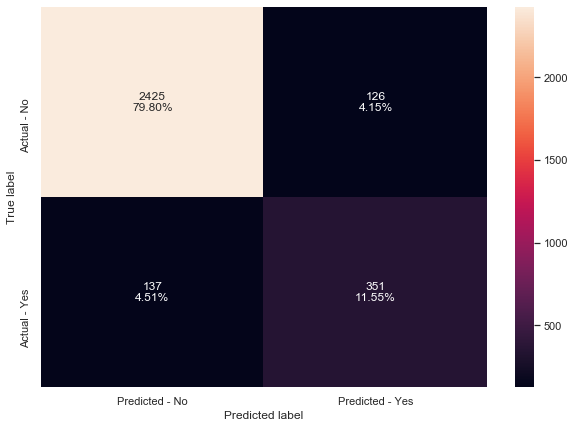

In [132]:
# Calculating different metrics
get_metrics_scores(bag_tuned2)

# Creating confusion matrix
make_confusion_matrixs(bag_tuned2, y_test)

- The test recall has not improved as compared to cross-validated recall.
- The model is not good at identifying potential customers who would leave their credit card services. 

## 8.Model Performances

### 8.1 Comparing all models

In [133]:
# defining list of models
models = [abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2, bag_tuned1, bag_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_scores(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [134]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) # to display numbers in digits
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Adaboost with GridSearchCV",
            "Adaboost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "BaggingClassifier with GridSearchCV",
            "BaggingClassifier with RandomizedSearchCV",          
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
2                  XGBoost with GridSearchCV          0.9508         0.9283   
3            XGBoost with RandomizedSearchCV          0.9522         0.9283   
1           Adaboost with RandomizedSearchCV          0.9917         0.9727   
0                 Adaboost with GridSearchCV          0.9891         0.9707   
4        BaggingClassifier with GridSearchCV          0.9200         0.9128   
5  BaggingClassifier with RandomizedSearchCV          0.9206         0.9135   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
2        0.9974       0.9549           0.7665          0.7039  
3        0.9982       0.9529           0.7714          0.7045  
1        0.9693       0.9057           0.9787          0.9228  
0        0.9587       0.8975           0.9733          0.9182  
4        0.7182       0.7193           0.7688          0.7328  
5        0.7208       0.7193           0.7702          0.7358

- The xgboost model tuned using Grid search is giving the best test recall of 0.95 but it has the less train and test precision.
- Let's see the feature importance from the tuned xgboost model.
- The time taken by XGBoost Grid search is 1h 14min 17s,where as with Random search time taken is less than Grid search.

**Feature importance - Tuned XGBoost**

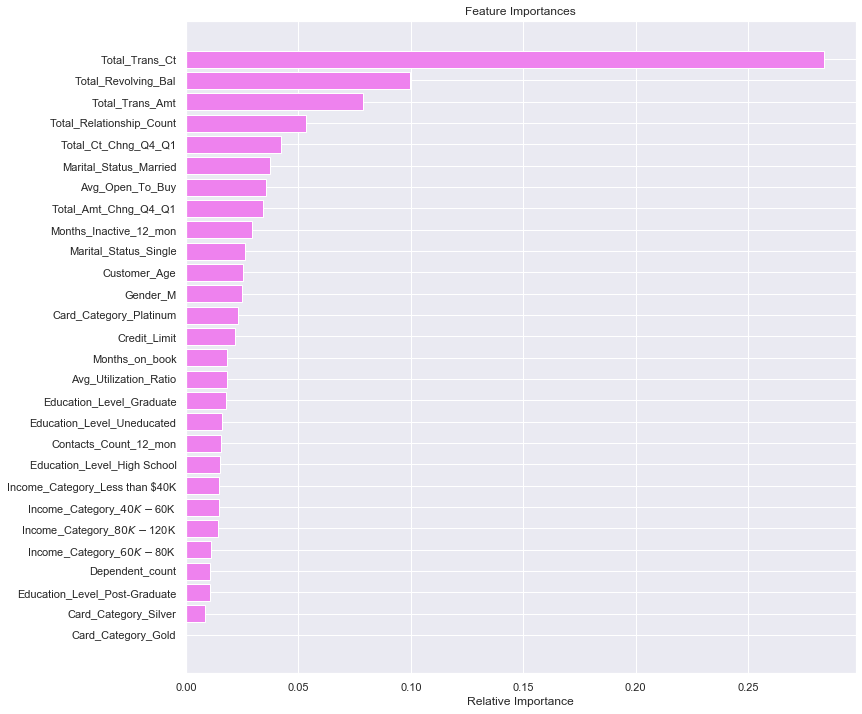

In [135]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total transaction count is the most important feature, followed by total revolving balance and total transaction amount.

## 9. Actionable Insights & Recommendations

- Bank should target Customers with more total transaction count - as these customers are more likely to leave their credit card services 
- We observed that more Female are leave their credit card sevices than Male. So Banks should target Female customers to retain them.
- We observed that 21% Customers who are doctorates are more likely to leave their credit card services than other occupation.
- 25% Customers with Platinum Card are leaving their credit card services compared to others cards. 
- Only 14% of customers with silver card are leaving. So Banks can check what benefits Silver card have which makes less customers to leave.
- 17% Customers with income above 120k are more likely to leave their credit card services. Only 13% customers with income range 60k to 80k 
has closed the credit card accounts. So Banks should target customers with income 120k and above.
- We observed that 93% of customers are holding blue cards compared to other cards. So Banks can analyze what attracts customers to choose blue cards compared to other cards.